<a href="https://colab.research.google.com/github/sayanmondal31/fashion-MNIST/blob/master/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:

x_train = x_train/127.5-1

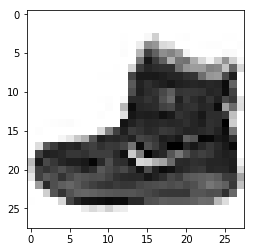

In [4]:
plt.imshow(x_train[0], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:

x_train = np.expand_dims(x_train, axis=3)

In [7]:

def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)            

In [8]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.547870, acc.: 57.81%] [G loss: 0.438267]


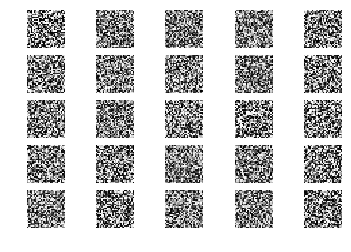

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.604461, acc.: 53.12%] [G loss: 0.522074]
2 [D loss: 0.495416, acc.: 59.38%] [G loss: 0.614421]
3 [D loss: 0.431556, acc.: 71.88%] [G loss: 0.768441]
4 [D loss: 0.364185, acc.: 73.44%] [G loss: 0.904709]
5 [D loss: 0.313647, acc.: 90.62%] [G loss: 1.063709]
6 [D loss: 0.274022, acc.: 92.19%] [G loss: 1.211317]
7 [D loss: 0.211652, acc.: 96.88%] [G loss: 1.325940]
8 [D loss: 0.188213, acc.: 100.00%] [G loss: 1.391839]
9 [D loss: 0.174083, acc.: 100.00%] [G loss: 1.525070]
10 [D loss: 0.137169, acc.: 100.00%] [G loss: 1.690001]
11 [D loss: 0.162395, acc.: 100.00%] [G loss: 1.746188]
12 [D loss: 0.121286, acc.: 100.00%] [G loss: 1.833413]
13 [D loss: 0.122883, acc.: 100.00%] [G loss: 1.926361]
14 [D loss: 0.103191, acc.: 100.00%] [G loss: 1.923235]
15 [D loss: 0.116807, acc.: 100.00%] [G loss: 1.917593]
16 [D loss: 0.089725, acc.: 100.00%] [G loss: 2.050091]
17 [D loss: 0.100028, acc.: 100.00%] [G loss: 2.119632]
18 [D loss: 0.084216, acc.: 100.00%] [G loss: 2.129734]
19 [D lo

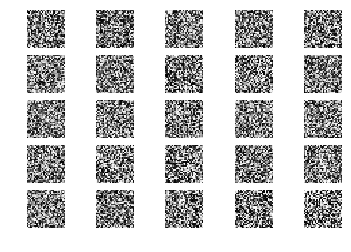

51 [D loss: 0.025507, acc.: 100.00%] [G loss: 3.417062]
52 [D loss: 0.026618, acc.: 100.00%] [G loss: 3.504028]
53 [D loss: 0.024317, acc.: 100.00%] [G loss: 3.563311]
54 [D loss: 0.049000, acc.: 98.44%] [G loss: 3.498512]
55 [D loss: 0.025360, acc.: 100.00%] [G loss: 3.537093]
56 [D loss: 0.021307, acc.: 100.00%] [G loss: 3.581587]
57 [D loss: 0.031369, acc.: 100.00%] [G loss: 3.600441]
58 [D loss: 0.018448, acc.: 100.00%] [G loss: 3.607769]
59 [D loss: 0.021107, acc.: 100.00%] [G loss: 3.579815]
60 [D loss: 0.021385, acc.: 100.00%] [G loss: 3.743211]
61 [D loss: 0.019172, acc.: 100.00%] [G loss: 3.757244]
62 [D loss: 0.025031, acc.: 100.00%] [G loss: 3.828016]
63 [D loss: 0.024039, acc.: 100.00%] [G loss: 3.747323]
64 [D loss: 0.021859, acc.: 100.00%] [G loss: 3.899079]
65 [D loss: 0.017620, acc.: 100.00%] [G loss: 3.818135]
66 [D loss: 0.018158, acc.: 100.00%] [G loss: 3.953160]
67 [D loss: 0.016226, acc.: 100.00%] [G loss: 3.896875]
68 [D loss: 0.017615, acc.: 100.00%] [G loss: 3.9

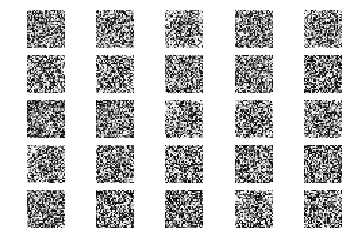

101 [D loss: 0.023873, acc.: 100.00%] [G loss: 4.335992]
102 [D loss: 0.017114, acc.: 100.00%] [G loss: 4.476617]
103 [D loss: 0.014140, acc.: 100.00%] [G loss: 4.413963]
104 [D loss: 0.022249, acc.: 100.00%] [G loss: 4.474095]
105 [D loss: 0.026886, acc.: 100.00%] [G loss: 4.250729]
106 [D loss: 0.022742, acc.: 100.00%] [G loss: 4.465061]
107 [D loss: 0.023182, acc.: 100.00%] [G loss: 4.424789]
108 [D loss: 0.015308, acc.: 100.00%] [G loss: 4.272314]
109 [D loss: 0.019314, acc.: 100.00%] [G loss: 4.592604]
110 [D loss: 0.017964, acc.: 100.00%] [G loss: 4.524726]
111 [D loss: 0.023517, acc.: 100.00%] [G loss: 4.484879]
112 [D loss: 0.044882, acc.: 98.44%] [G loss: 4.689042]
113 [D loss: 0.030806, acc.: 98.44%] [G loss: 4.381103]
114 [D loss: 0.025330, acc.: 100.00%] [G loss: 4.583895]
115 [D loss: 0.019425, acc.: 100.00%] [G loss: 4.711465]
116 [D loss: 0.014595, acc.: 100.00%] [G loss: 4.379478]
117 [D loss: 0.021760, acc.: 100.00%] [G loss: 4.499288]
118 [D loss: 0.043710, acc.: 100.

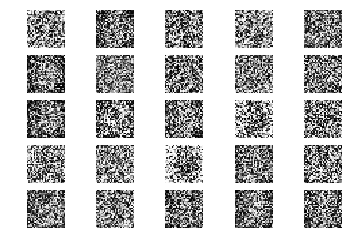

151 [D loss: 0.030521, acc.: 100.00%] [G loss: 4.503967]
152 [D loss: 0.139649, acc.: 95.31%] [G loss: 4.474663]
153 [D loss: 0.032693, acc.: 100.00%] [G loss: 4.572175]
154 [D loss: 0.030943, acc.: 98.44%] [G loss: 4.792241]
155 [D loss: 0.087661, acc.: 98.44%] [G loss: 4.301320]
156 [D loss: 0.074094, acc.: 95.31%] [G loss: 4.845910]
157 [D loss: 0.097506, acc.: 98.44%] [G loss: 4.822729]
158 [D loss: 0.032302, acc.: 100.00%] [G loss: 4.601404]
159 [D loss: 0.117056, acc.: 96.88%] [G loss: 4.207604]
160 [D loss: 0.021773, acc.: 100.00%] [G loss: 4.605771]
161 [D loss: 0.030230, acc.: 100.00%] [G loss: 4.717489]
162 [D loss: 0.047400, acc.: 100.00%] [G loss: 4.886692]
163 [D loss: 0.067097, acc.: 98.44%] [G loss: 4.957328]
164 [D loss: 0.038941, acc.: 100.00%] [G loss: 4.756990]
165 [D loss: 0.053393, acc.: 98.44%] [G loss: 4.657777]
166 [D loss: 0.191034, acc.: 89.06%] [G loss: 4.867067]
167 [D loss: 0.052446, acc.: 98.44%] [G loss: 4.709868]
168 [D loss: 0.141356, acc.: 96.88%] [G l

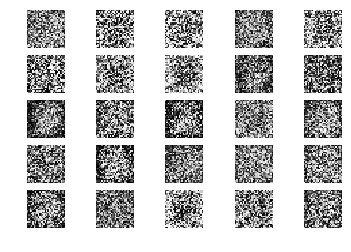

201 [D loss: 0.076301, acc.: 98.44%] [G loss: 3.916096]
202 [D loss: 0.197961, acc.: 92.19%] [G loss: 4.299701]
203 [D loss: 0.064569, acc.: 98.44%] [G loss: 4.579435]
204 [D loss: 0.114504, acc.: 96.88%] [G loss: 4.061253]
205 [D loss: 0.100448, acc.: 95.31%] [G loss: 4.569046]
206 [D loss: 0.054476, acc.: 98.44%] [G loss: 4.666067]
207 [D loss: 0.188780, acc.: 90.62%] [G loss: 4.028233]
208 [D loss: 0.075131, acc.: 100.00%] [G loss: 4.076024]
209 [D loss: 0.039848, acc.: 100.00%] [G loss: 4.364375]
210 [D loss: 0.282928, acc.: 89.06%] [G loss: 3.464766]
211 [D loss: 0.142590, acc.: 93.75%] [G loss: 4.331350]
212 [D loss: 0.142311, acc.: 96.88%] [G loss: 3.616313]
213 [D loss: 0.094452, acc.: 95.31%] [G loss: 3.600134]
214 [D loss: 0.086788, acc.: 98.44%] [G loss: 3.781128]
215 [D loss: 0.133158, acc.: 93.75%] [G loss: 4.375987]
216 [D loss: 0.199505, acc.: 95.31%] [G loss: 3.829522]
217 [D loss: 0.114305, acc.: 95.31%] [G loss: 4.058174]
218 [D loss: 0.101932, acc.: 96.88%] [G loss: 

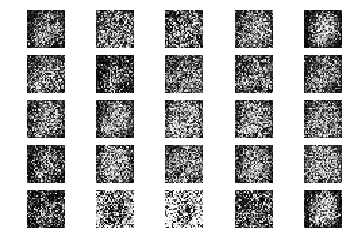

251 [D loss: 0.145736, acc.: 98.44%] [G loss: 3.898211]
252 [D loss: 0.104549, acc.: 100.00%] [G loss: 4.773253]
253 [D loss: 0.344326, acc.: 85.94%] [G loss: 4.205122]
254 [D loss: 0.512769, acc.: 81.25%] [G loss: 3.561728]
255 [D loss: 0.089007, acc.: 98.44%] [G loss: 4.171468]
256 [D loss: 0.361617, acc.: 84.38%] [G loss: 3.863142]
257 [D loss: 0.264195, acc.: 89.06%] [G loss: 4.467964]
258 [D loss: 0.294152, acc.: 93.75%] [G loss: 3.883742]
259 [D loss: 0.377319, acc.: 76.56%] [G loss: 3.714007]
260 [D loss: 0.365497, acc.: 82.81%] [G loss: 3.722673]
261 [D loss: 0.116386, acc.: 96.88%] [G loss: 4.481434]
262 [D loss: 0.449917, acc.: 78.12%] [G loss: 3.183621]
263 [D loss: 0.153986, acc.: 95.31%] [G loss: 2.921483]
264 [D loss: 0.237326, acc.: 89.06%] [G loss: 3.520482]
265 [D loss: 0.301252, acc.: 87.50%] [G loss: 3.650403]
266 [D loss: 0.231891, acc.: 90.62%] [G loss: 3.470715]
267 [D loss: 0.152458, acc.: 93.75%] [G loss: 3.702696]
268 [D loss: 0.158005, acc.: 95.31%] [G loss: 3

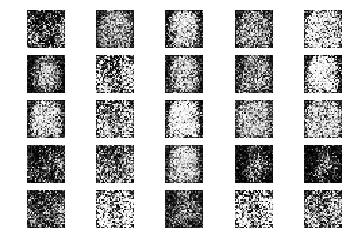

301 [D loss: 0.261609, acc.: 92.19%] [G loss: 4.022415]
302 [D loss: 0.194525, acc.: 95.31%] [G loss: 3.604368]
303 [D loss: 0.141410, acc.: 95.31%] [G loss: 3.662875]
304 [D loss: 0.274016, acc.: 90.62%] [G loss: 3.454078]
305 [D loss: 0.351176, acc.: 92.19%] [G loss: 2.743382]
306 [D loss: 0.175114, acc.: 93.75%] [G loss: 3.279860]
307 [D loss: 0.226988, acc.: 89.06%] [G loss: 3.549734]
308 [D loss: 0.235627, acc.: 92.19%] [G loss: 4.169190]
309 [D loss: 0.268299, acc.: 87.50%] [G loss: 2.612791]
310 [D loss: 0.242144, acc.: 90.62%] [G loss: 3.593979]
311 [D loss: 0.250473, acc.: 84.38%] [G loss: 4.187456]
312 [D loss: 0.173529, acc.: 96.88%] [G loss: 3.981452]
313 [D loss: 0.166100, acc.: 93.75%] [G loss: 4.188737]
314 [D loss: 0.432113, acc.: 79.69%] [G loss: 3.227190]
315 [D loss: 0.188929, acc.: 93.75%] [G loss: 3.390323]
316 [D loss: 0.247497, acc.: 92.19%] [G loss: 3.536067]
317 [D loss: 0.265822, acc.: 93.75%] [G loss: 3.470459]
318 [D loss: 0.196203, acc.: 93.75%] [G loss: 3.

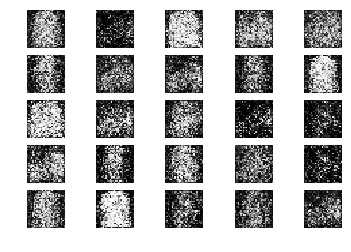

351 [D loss: 0.176869, acc.: 93.75%] [G loss: 3.593066]
352 [D loss: 0.232323, acc.: 93.75%] [G loss: 2.698001]
353 [D loss: 0.249319, acc.: 96.88%] [G loss: 3.169826]
354 [D loss: 0.262621, acc.: 92.19%] [G loss: 2.753601]
355 [D loss: 0.219999, acc.: 92.19%] [G loss: 3.228737]
356 [D loss: 0.217000, acc.: 90.62%] [G loss: 3.117215]
357 [D loss: 0.414619, acc.: 81.25%] [G loss: 3.275710]
358 [D loss: 0.224476, acc.: 95.31%] [G loss: 3.138730]
359 [D loss: 0.381603, acc.: 84.38%] [G loss: 2.460875]
360 [D loss: 0.153879, acc.: 96.88%] [G loss: 3.542825]
361 [D loss: 0.204920, acc.: 93.75%] [G loss: 2.535954]
362 [D loss: 0.233287, acc.: 92.19%] [G loss: 2.785330]
363 [D loss: 0.412892, acc.: 87.50%] [G loss: 3.687169]
364 [D loss: 0.708250, acc.: 62.50%] [G loss: 3.314729]
365 [D loss: 0.222072, acc.: 92.19%] [G loss: 3.583301]
366 [D loss: 0.320551, acc.: 85.94%] [G loss: 3.520589]
367 [D loss: 0.244825, acc.: 90.62%] [G loss: 3.108053]
368 [D loss: 0.366129, acc.: 89.06%] [G loss: 3.

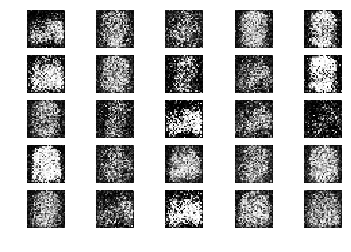

401 [D loss: 0.651499, acc.: 68.75%] [G loss: 2.310560]
402 [D loss: 0.579164, acc.: 65.62%] [G loss: 2.782396]
403 [D loss: 0.448058, acc.: 87.50%] [G loss: 1.838597]
404 [D loss: 0.470637, acc.: 81.25%] [G loss: 2.097819]
405 [D loss: 0.415387, acc.: 79.69%] [G loss: 2.155034]
406 [D loss: 0.917864, acc.: 50.00%] [G loss: 1.731733]
407 [D loss: 0.398685, acc.: 79.69%] [G loss: 3.126986]
408 [D loss: 1.037078, acc.: 68.75%] [G loss: 1.850168]
409 [D loss: 0.844801, acc.: 70.31%] [G loss: 2.452310]
410 [D loss: 0.517687, acc.: 76.56%] [G loss: 2.339394]
411 [D loss: 0.702955, acc.: 68.75%] [G loss: 2.287913]
412 [D loss: 0.964712, acc.: 48.44%] [G loss: 1.701421]
413 [D loss: 0.411793, acc.: 87.50%] [G loss: 2.665981]
414 [D loss: 1.089636, acc.: 53.12%] [G loss: 1.344694]
415 [D loss: 0.656687, acc.: 56.25%] [G loss: 1.870868]
416 [D loss: 0.727222, acc.: 70.31%] [G loss: 2.032854]
417 [D loss: 0.485422, acc.: 73.44%] [G loss: 1.840239]
418 [D loss: 0.667574, acc.: 60.94%] [G loss: 2.

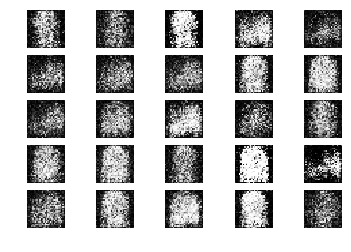

451 [D loss: 0.793566, acc.: 57.81%] [G loss: 1.211153]
452 [D loss: 0.651975, acc.: 59.38%] [G loss: 1.392054]
453 [D loss: 0.824389, acc.: 53.12%] [G loss: 1.213879]
454 [D loss: 0.578096, acc.: 75.00%] [G loss: 1.201173]
455 [D loss: 0.734078, acc.: 43.75%] [G loss: 1.064215]
456 [D loss: 0.656405, acc.: 64.06%] [G loss: 1.372621]
457 [D loss: 0.731519, acc.: 64.06%] [G loss: 1.261348]
458 [D loss: 0.729865, acc.: 62.50%] [G loss: 1.024686]
459 [D loss: 0.577578, acc.: 68.75%] [G loss: 1.374979]
460 [D loss: 0.663482, acc.: 68.75%] [G loss: 1.387248]
461 [D loss: 0.628256, acc.: 68.75%] [G loss: 1.504596]
462 [D loss: 0.710504, acc.: 67.19%] [G loss: 1.357769]
463 [D loss: 0.677119, acc.: 64.06%] [G loss: 1.170734]
464 [D loss: 0.530276, acc.: 71.88%] [G loss: 1.472641]
465 [D loss: 0.618607, acc.: 67.19%] [G loss: 1.485274]
466 [D loss: 0.516370, acc.: 76.56%] [G loss: 1.449256]
467 [D loss: 0.654691, acc.: 67.19%] [G loss: 1.179648]
468 [D loss: 0.717693, acc.: 57.81%] [G loss: 1.

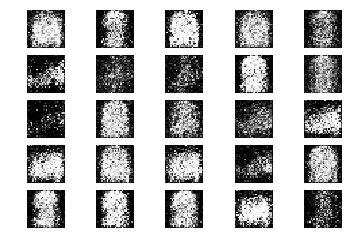

501 [D loss: 0.652117, acc.: 78.12%] [G loss: 1.198524]
502 [D loss: 0.647854, acc.: 62.50%] [G loss: 1.077380]
503 [D loss: 0.652535, acc.: 65.62%] [G loss: 1.048484]
504 [D loss: 0.645932, acc.: 64.06%] [G loss: 1.094603]
505 [D loss: 0.530786, acc.: 81.25%] [G loss: 1.197318]
506 [D loss: 0.617961, acc.: 67.19%] [G loss: 1.098050]
507 [D loss: 0.542916, acc.: 70.31%] [G loss: 1.097708]
508 [D loss: 0.623802, acc.: 81.25%] [G loss: 1.121013]
509 [D loss: 0.532388, acc.: 73.44%] [G loss: 1.195153]
510 [D loss: 0.568122, acc.: 64.06%] [G loss: 1.320182]
511 [D loss: 0.590790, acc.: 76.56%] [G loss: 1.096759]
512 [D loss: 0.581710, acc.: 65.62%] [G loss: 1.085876]
513 [D loss: 0.638542, acc.: 71.88%] [G loss: 1.144287]
514 [D loss: 0.521089, acc.: 76.56%] [G loss: 1.178274]
515 [D loss: 0.713751, acc.: 67.19%] [G loss: 1.180288]
516 [D loss: 0.472948, acc.: 76.56%] [G loss: 1.243840]
517 [D loss: 0.613362, acc.: 64.06%] [G loss: 1.252860]
518 [D loss: 0.685331, acc.: 59.38%] [G loss: 1.

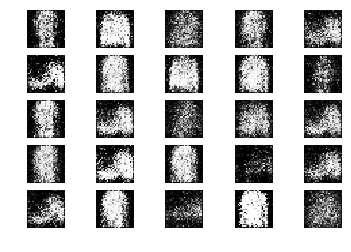

551 [D loss: 0.532025, acc.: 75.00%] [G loss: 1.150581]
552 [D loss: 0.453617, acc.: 78.12%] [G loss: 1.276711]
553 [D loss: 0.597822, acc.: 70.31%] [G loss: 1.294299]
554 [D loss: 0.631897, acc.: 67.19%] [G loss: 1.203475]
555 [D loss: 0.724598, acc.: 68.75%] [G loss: 1.110998]
556 [D loss: 0.662794, acc.: 59.38%] [G loss: 1.021377]
557 [D loss: 0.678713, acc.: 60.94%] [G loss: 1.188057]
558 [D loss: 0.687604, acc.: 70.31%] [G loss: 1.032465]
559 [D loss: 0.657082, acc.: 60.94%] [G loss: 1.051867]
560 [D loss: 0.576501, acc.: 68.75%] [G loss: 1.094115]
561 [D loss: 0.667236, acc.: 65.62%] [G loss: 1.140429]
562 [D loss: 0.559249, acc.: 76.56%] [G loss: 1.072218]
563 [D loss: 0.618949, acc.: 68.75%] [G loss: 1.202049]
564 [D loss: 0.554923, acc.: 75.00%] [G loss: 1.062425]
565 [D loss: 0.615676, acc.: 56.25%] [G loss: 1.027532]
566 [D loss: 0.632027, acc.: 62.50%] [G loss: 1.005110]
567 [D loss: 0.665337, acc.: 56.25%] [G loss: 0.947711]
568 [D loss: 0.619746, acc.: 65.62%] [G loss: 1.

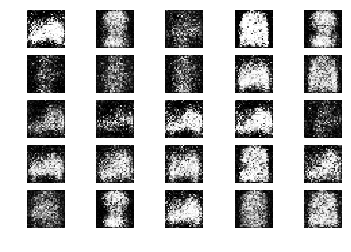

601 [D loss: 0.643867, acc.: 64.06%] [G loss: 1.017254]
602 [D loss: 0.607578, acc.: 65.62%] [G loss: 1.101065]
603 [D loss: 0.595425, acc.: 70.31%] [G loss: 1.037573]
604 [D loss: 0.639586, acc.: 64.06%] [G loss: 1.045195]
605 [D loss: 0.641513, acc.: 64.06%] [G loss: 1.068997]
606 [D loss: 0.568862, acc.: 71.88%] [G loss: 1.130743]
607 [D loss: 0.572755, acc.: 68.75%] [G loss: 1.140378]
608 [D loss: 0.584172, acc.: 75.00%] [G loss: 1.081203]
609 [D loss: 0.671975, acc.: 62.50%] [G loss: 1.026353]
610 [D loss: 0.561631, acc.: 71.88%] [G loss: 1.170956]
611 [D loss: 0.540247, acc.: 78.12%] [G loss: 1.242907]
612 [D loss: 0.590381, acc.: 76.56%] [G loss: 1.062631]
613 [D loss: 0.640522, acc.: 59.38%] [G loss: 1.117369]
614 [D loss: 0.590668, acc.: 68.75%] [G loss: 1.089338]
615 [D loss: 0.597261, acc.: 68.75%] [G loss: 1.082201]
616 [D loss: 0.627104, acc.: 73.44%] [G loss: 1.150800]
617 [D loss: 0.731872, acc.: 54.69%] [G loss: 1.032570]
618 [D loss: 0.588890, acc.: 71.88%] [G loss: 1.

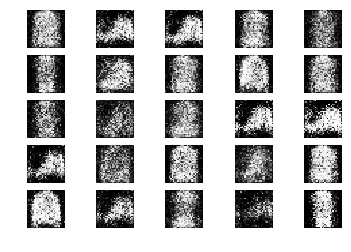

651 [D loss: 0.654572, acc.: 57.81%] [G loss: 1.081719]
652 [D loss: 0.581706, acc.: 70.31%] [G loss: 0.978381]
653 [D loss: 0.583961, acc.: 68.75%] [G loss: 1.118776]
654 [D loss: 0.604320, acc.: 67.19%] [G loss: 1.083282]
655 [D loss: 0.642744, acc.: 57.81%] [G loss: 0.992994]
656 [D loss: 0.535439, acc.: 78.12%] [G loss: 1.076209]
657 [D loss: 0.555720, acc.: 76.56%] [G loss: 1.045318]
658 [D loss: 0.584946, acc.: 67.19%] [G loss: 1.081400]
659 [D loss: 0.585270, acc.: 76.56%] [G loss: 0.997905]
660 [D loss: 0.550979, acc.: 70.31%] [G loss: 1.172662]
661 [D loss: 0.550609, acc.: 68.75%] [G loss: 1.249488]
662 [D loss: 0.469198, acc.: 79.69%] [G loss: 1.311553]
663 [D loss: 0.731934, acc.: 56.25%] [G loss: 1.108357]
664 [D loss: 0.632355, acc.: 65.62%] [G loss: 1.031685]
665 [D loss: 0.561527, acc.: 71.88%] [G loss: 1.132111]
666 [D loss: 0.558139, acc.: 71.88%] [G loss: 1.109922]
667 [D loss: 0.622996, acc.: 67.19%] [G loss: 1.023682]
668 [D loss: 0.606779, acc.: 60.94%] [G loss: 1.

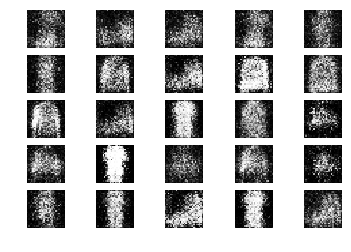

701 [D loss: 0.635037, acc.: 62.50%] [G loss: 1.083827]
702 [D loss: 0.582709, acc.: 68.75%] [G loss: 1.036466]
703 [D loss: 0.577104, acc.: 71.88%] [G loss: 0.973000]
704 [D loss: 0.599923, acc.: 71.88%] [G loss: 1.009766]
705 [D loss: 0.761533, acc.: 53.12%] [G loss: 1.035746]
706 [D loss: 0.679572, acc.: 54.69%] [G loss: 0.914162]
707 [D loss: 0.659791, acc.: 60.94%] [G loss: 1.019660]
708 [D loss: 0.634862, acc.: 67.19%] [G loss: 0.930081]
709 [D loss: 0.676606, acc.: 64.06%] [G loss: 0.984543]
710 [D loss: 0.572308, acc.: 68.75%] [G loss: 1.043325]
711 [D loss: 0.619133, acc.: 71.88%] [G loss: 1.042936]
712 [D loss: 0.540433, acc.: 76.56%] [G loss: 1.052924]
713 [D loss: 0.611547, acc.: 67.19%] [G loss: 1.028037]
714 [D loss: 0.600467, acc.: 70.31%] [G loss: 1.025345]
715 [D loss: 0.617157, acc.: 68.75%] [G loss: 0.980959]
716 [D loss: 0.571199, acc.: 70.31%] [G loss: 1.034245]
717 [D loss: 0.498252, acc.: 79.69%] [G loss: 0.998096]
718 [D loss: 0.573593, acc.: 68.75%] [G loss: 1.

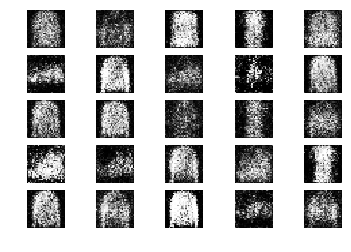

751 [D loss: 0.711038, acc.: 54.69%] [G loss: 1.049432]
752 [D loss: 0.575909, acc.: 68.75%] [G loss: 1.082520]
753 [D loss: 0.540268, acc.: 84.38%] [G loss: 0.990499]
754 [D loss: 0.552159, acc.: 70.31%] [G loss: 1.119699]
755 [D loss: 0.619155, acc.: 71.88%] [G loss: 1.058158]
756 [D loss: 0.757641, acc.: 51.56%] [G loss: 0.963856]
757 [D loss: 0.624424, acc.: 60.94%] [G loss: 1.113691]
758 [D loss: 0.663987, acc.: 59.38%] [G loss: 1.126736]
759 [D loss: 0.581671, acc.: 67.19%] [G loss: 1.128055]
760 [D loss: 0.623140, acc.: 68.75%] [G loss: 0.978254]
761 [D loss: 0.596725, acc.: 62.50%] [G loss: 0.960313]
762 [D loss: 0.614534, acc.: 65.62%] [G loss: 0.917106]
763 [D loss: 0.563336, acc.: 71.88%] [G loss: 0.982866]
764 [D loss: 0.555850, acc.: 75.00%] [G loss: 1.088169]
765 [D loss: 0.601689, acc.: 71.88%] [G loss: 1.112441]
766 [D loss: 0.635592, acc.: 62.50%] [G loss: 1.090838]
767 [D loss: 0.623385, acc.: 64.06%] [G loss: 0.941311]
768 [D loss: 0.521938, acc.: 73.44%] [G loss: 1.

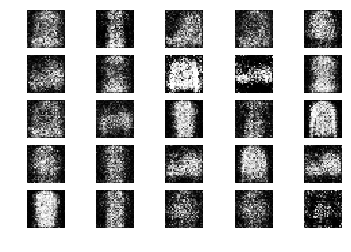

801 [D loss: 0.565856, acc.: 70.31%] [G loss: 1.012622]
802 [D loss: 0.612167, acc.: 62.50%] [G loss: 0.997328]
803 [D loss: 0.558096, acc.: 75.00%] [G loss: 1.021958]
804 [D loss: 0.702768, acc.: 48.44%] [G loss: 0.961820]
805 [D loss: 0.575291, acc.: 70.31%] [G loss: 0.959569]
806 [D loss: 0.592293, acc.: 73.44%] [G loss: 0.996516]
807 [D loss: 0.580148, acc.: 70.31%] [G loss: 1.025824]
808 [D loss: 0.660184, acc.: 62.50%] [G loss: 1.048537]
809 [D loss: 0.569208, acc.: 76.56%] [G loss: 1.106919]
810 [D loss: 0.678204, acc.: 59.38%] [G loss: 0.916612]
811 [D loss: 0.597715, acc.: 68.75%] [G loss: 0.954038]
812 [D loss: 0.485627, acc.: 75.00%] [G loss: 0.975228]
813 [D loss: 0.661908, acc.: 57.81%] [G loss: 0.942947]
814 [D loss: 0.598589, acc.: 65.62%] [G loss: 1.105302]
815 [D loss: 0.653480, acc.: 59.38%] [G loss: 1.147288]
816 [D loss: 0.651183, acc.: 64.06%] [G loss: 1.095299]
817 [D loss: 0.687110, acc.: 56.25%] [G loss: 0.934705]
818 [D loss: 0.610322, acc.: 54.69%] [G loss: 1.

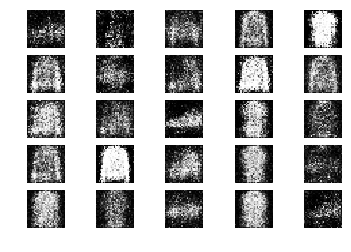

851 [D loss: 0.677469, acc.: 56.25%] [G loss: 0.863351]
852 [D loss: 0.672400, acc.: 64.06%] [G loss: 0.952382]
853 [D loss: 0.601541, acc.: 71.88%] [G loss: 0.957167]
854 [D loss: 0.552281, acc.: 75.00%] [G loss: 0.972813]
855 [D loss: 0.618255, acc.: 60.94%] [G loss: 1.004061]
856 [D loss: 0.621881, acc.: 68.75%] [G loss: 1.067549]
857 [D loss: 0.656590, acc.: 57.81%] [G loss: 0.940473]
858 [D loss: 0.585474, acc.: 68.75%] [G loss: 1.001237]
859 [D loss: 0.635349, acc.: 68.75%] [G loss: 1.006054]
860 [D loss: 0.578087, acc.: 70.31%] [G loss: 1.050453]
861 [D loss: 0.651370, acc.: 60.94%] [G loss: 1.029386]
862 [D loss: 0.712517, acc.: 45.31%] [G loss: 0.959647]
863 [D loss: 0.668968, acc.: 57.81%] [G loss: 0.966714]
864 [D loss: 0.600813, acc.: 71.88%] [G loss: 1.080797]
865 [D loss: 0.591004, acc.: 64.06%] [G loss: 0.966098]
866 [D loss: 0.638887, acc.: 59.38%] [G loss: 0.937068]
867 [D loss: 0.659618, acc.: 59.38%] [G loss: 0.956045]
868 [D loss: 0.584127, acc.: 79.69%] [G loss: 0.

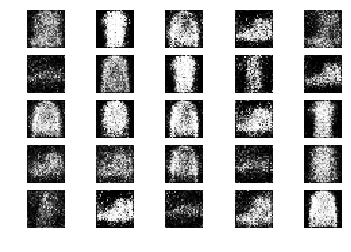

901 [D loss: 0.614136, acc.: 73.44%] [G loss: 0.977627]
902 [D loss: 0.661530, acc.: 62.50%] [G loss: 0.892211]
903 [D loss: 0.543474, acc.: 75.00%] [G loss: 1.014152]
904 [D loss: 0.569887, acc.: 71.88%] [G loss: 0.982951]
905 [D loss: 0.606809, acc.: 60.94%] [G loss: 0.915176]
906 [D loss: 0.539137, acc.: 76.56%] [G loss: 1.051799]
907 [D loss: 0.677142, acc.: 53.12%] [G loss: 0.971308]
908 [D loss: 0.647542, acc.: 64.06%] [G loss: 0.912586]
909 [D loss: 0.569504, acc.: 73.44%] [G loss: 0.941014]
910 [D loss: 0.690861, acc.: 62.50%] [G loss: 1.013584]
911 [D loss: 0.636820, acc.: 68.75%] [G loss: 0.980168]
912 [D loss: 0.716450, acc.: 53.12%] [G loss: 0.884903]
913 [D loss: 0.680454, acc.: 62.50%] [G loss: 0.924553]
914 [D loss: 0.605343, acc.: 60.94%] [G loss: 1.002928]
915 [D loss: 0.593903, acc.: 67.19%] [G loss: 1.055767]
916 [D loss: 0.621356, acc.: 67.19%] [G loss: 0.994115]
917 [D loss: 0.648489, acc.: 59.38%] [G loss: 0.866406]
918 [D loss: 0.598296, acc.: 70.31%] [G loss: 0.

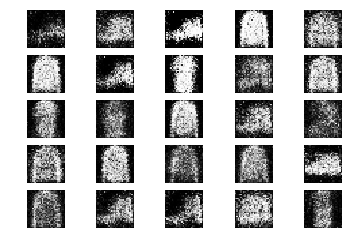

951 [D loss: 0.647381, acc.: 60.94%] [G loss: 1.087194]
952 [D loss: 0.614517, acc.: 64.06%] [G loss: 1.000970]
953 [D loss: 0.554275, acc.: 71.88%] [G loss: 1.051866]
954 [D loss: 0.634977, acc.: 56.25%] [G loss: 1.048078]
955 [D loss: 0.589946, acc.: 65.62%] [G loss: 0.987468]
956 [D loss: 0.657650, acc.: 57.81%] [G loss: 1.035099]
957 [D loss: 0.574619, acc.: 64.06%] [G loss: 1.051896]
958 [D loss: 0.590766, acc.: 70.31%] [G loss: 0.951044]
959 [D loss: 0.607518, acc.: 65.62%] [G loss: 1.027481]
960 [D loss: 0.666825, acc.: 62.50%] [G loss: 1.017390]
961 [D loss: 0.527254, acc.: 70.31%] [G loss: 0.984572]
962 [D loss: 0.623414, acc.: 65.62%] [G loss: 0.922321]
963 [D loss: 0.611266, acc.: 62.50%] [G loss: 0.937198]
964 [D loss: 0.628456, acc.: 56.25%] [G loss: 1.020410]
965 [D loss: 0.686837, acc.: 53.12%] [G loss: 1.000654]
966 [D loss: 0.609927, acc.: 64.06%] [G loss: 1.027222]
967 [D loss: 0.660904, acc.: 57.81%] [G loss: 0.990337]
968 [D loss: 0.559824, acc.: 71.88%] [G loss: 0.

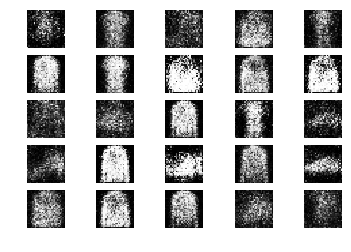

1001 [D loss: 0.564767, acc.: 73.44%] [G loss: 0.934557]
1002 [D loss: 0.605205, acc.: 65.62%] [G loss: 0.877718]
1003 [D loss: 0.609267, acc.: 67.19%] [G loss: 0.878626]
1004 [D loss: 0.583922, acc.: 68.75%] [G loss: 1.084924]
1005 [D loss: 0.616589, acc.: 64.06%] [G loss: 1.030556]
1006 [D loss: 0.625347, acc.: 64.06%] [G loss: 0.971038]
1007 [D loss: 0.548849, acc.: 79.69%] [G loss: 0.922455]
1008 [D loss: 0.592152, acc.: 70.31%] [G loss: 0.887749]
1009 [D loss: 0.572003, acc.: 73.44%] [G loss: 0.953436]
1010 [D loss: 0.611644, acc.: 67.19%] [G loss: 0.848280]
1011 [D loss: 0.592448, acc.: 67.19%] [G loss: 1.010038]
1012 [D loss: 0.643499, acc.: 62.50%] [G loss: 0.956706]
1013 [D loss: 0.713554, acc.: 54.69%] [G loss: 1.046613]
1014 [D loss: 0.617308, acc.: 67.19%] [G loss: 0.965208]
1015 [D loss: 0.609787, acc.: 65.62%] [G loss: 0.909092]
1016 [D loss: 0.600802, acc.: 70.31%] [G loss: 0.904957]
1017 [D loss: 0.631343, acc.: 65.62%] [G loss: 1.000994]
1018 [D loss: 0.580251, acc.: 7

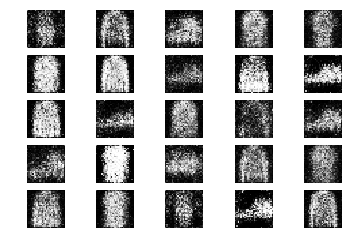

1051 [D loss: 0.616487, acc.: 73.44%] [G loss: 0.915779]
1052 [D loss: 0.585501, acc.: 67.19%] [G loss: 0.927629]
1053 [D loss: 0.541537, acc.: 79.69%] [G loss: 0.966306]
1054 [D loss: 0.556109, acc.: 75.00%] [G loss: 0.958863]
1055 [D loss: 0.657192, acc.: 65.62%] [G loss: 1.026704]
1056 [D loss: 0.654622, acc.: 56.25%] [G loss: 1.009341]
1057 [D loss: 0.574015, acc.: 71.88%] [G loss: 1.011384]
1058 [D loss: 0.588620, acc.: 67.19%] [G loss: 1.031212]
1059 [D loss: 0.604962, acc.: 62.50%] [G loss: 1.043843]
1060 [D loss: 0.682876, acc.: 57.81%] [G loss: 0.935026]
1061 [D loss: 0.638500, acc.: 62.50%] [G loss: 0.901681]
1062 [D loss: 0.622034, acc.: 70.31%] [G loss: 0.907726]
1063 [D loss: 0.617570, acc.: 67.19%] [G loss: 0.925902]
1064 [D loss: 0.596246, acc.: 71.88%] [G loss: 0.850600]
1065 [D loss: 0.581854, acc.: 67.19%] [G loss: 0.993451]
1066 [D loss: 0.631844, acc.: 60.94%] [G loss: 1.016107]
1067 [D loss: 0.648496, acc.: 53.12%] [G loss: 0.993553]
1068 [D loss: 0.678602, acc.: 5

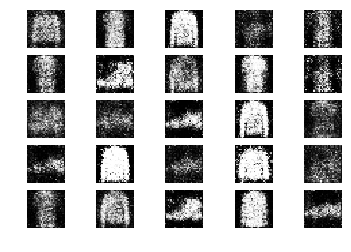

1101 [D loss: 0.648504, acc.: 59.38%] [G loss: 0.893810]
1102 [D loss: 0.607651, acc.: 62.50%] [G loss: 1.053099]
1103 [D loss: 0.538008, acc.: 75.00%] [G loss: 1.058994]
1104 [D loss: 0.623226, acc.: 65.62%] [G loss: 0.910389]
1105 [D loss: 0.614593, acc.: 65.62%] [G loss: 1.003586]
1106 [D loss: 0.467126, acc.: 87.50%] [G loss: 0.957918]
1107 [D loss: 0.655654, acc.: 53.12%] [G loss: 1.055586]
1108 [D loss: 0.607726, acc.: 67.19%] [G loss: 1.038449]
1109 [D loss: 0.624976, acc.: 65.62%] [G loss: 0.938843]
1110 [D loss: 0.712516, acc.: 53.12%] [G loss: 0.949432]
1111 [D loss: 0.555759, acc.: 70.31%] [G loss: 0.885294]
1112 [D loss: 0.573365, acc.: 71.88%] [G loss: 0.951206]
1113 [D loss: 0.671646, acc.: 64.06%] [G loss: 0.923822]
1114 [D loss: 0.644457, acc.: 64.06%] [G loss: 0.896313]
1115 [D loss: 0.642828, acc.: 67.19%] [G loss: 0.869584]
1116 [D loss: 0.656296, acc.: 50.00%] [G loss: 0.847044]
1117 [D loss: 0.585249, acc.: 65.62%] [G loss: 0.883673]
1118 [D loss: 0.600732, acc.: 6

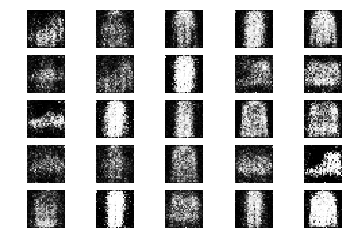

1151 [D loss: 0.633526, acc.: 64.06%] [G loss: 0.946357]
1152 [D loss: 0.577904, acc.: 71.88%] [G loss: 0.987327]
1153 [D loss: 0.653533, acc.: 57.81%] [G loss: 0.917222]
1154 [D loss: 0.597973, acc.: 70.31%] [G loss: 0.965618]
1155 [D loss: 0.598324, acc.: 76.56%] [G loss: 0.940842]
1156 [D loss: 0.562905, acc.: 64.06%] [G loss: 1.028957]
1157 [D loss: 0.509642, acc.: 82.81%] [G loss: 1.028333]
1158 [D loss: 0.487433, acc.: 81.25%] [G loss: 0.848788]
1159 [D loss: 0.656056, acc.: 59.38%] [G loss: 0.903521]
1160 [D loss: 0.552350, acc.: 70.31%] [G loss: 1.003890]
1161 [D loss: 0.656339, acc.: 60.94%] [G loss: 0.886351]
1162 [D loss: 0.596533, acc.: 71.88%] [G loss: 0.939521]
1163 [D loss: 0.669040, acc.: 57.81%] [G loss: 0.941837]
1164 [D loss: 0.582650, acc.: 70.31%] [G loss: 0.968417]
1165 [D loss: 0.553632, acc.: 79.69%] [G loss: 0.965830]
1166 [D loss: 0.639518, acc.: 67.19%] [G loss: 1.033328]
1167 [D loss: 0.607308, acc.: 64.06%] [G loss: 0.963101]
1168 [D loss: 0.571540, acc.: 6

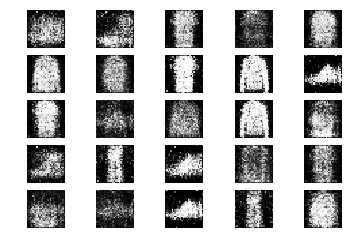

1201 [D loss: 0.681177, acc.: 56.25%] [G loss: 0.884933]
1202 [D loss: 0.646994, acc.: 57.81%] [G loss: 0.924379]
1203 [D loss: 0.622941, acc.: 64.06%] [G loss: 0.927257]
1204 [D loss: 0.572135, acc.: 65.62%] [G loss: 0.916388]
1205 [D loss: 0.612587, acc.: 65.62%] [G loss: 0.876647]
1206 [D loss: 0.581907, acc.: 70.31%] [G loss: 0.936217]
1207 [D loss: 0.689840, acc.: 57.81%] [G loss: 0.847396]
1208 [D loss: 0.605231, acc.: 65.62%] [G loss: 0.848961]
1209 [D loss: 0.609735, acc.: 60.94%] [G loss: 0.971105]
1210 [D loss: 0.658866, acc.: 59.38%] [G loss: 0.988593]
1211 [D loss: 0.675910, acc.: 57.81%] [G loss: 0.887373]
1212 [D loss: 0.617455, acc.: 59.38%] [G loss: 0.872766]
1213 [D loss: 0.597287, acc.: 67.19%] [G loss: 0.907103]
1214 [D loss: 0.629616, acc.: 56.25%] [G loss: 0.954741]
1215 [D loss: 0.610871, acc.: 64.06%] [G loss: 0.857969]
1216 [D loss: 0.723520, acc.: 57.81%] [G loss: 0.876017]
1217 [D loss: 0.660123, acc.: 51.56%] [G loss: 0.871340]
1218 [D loss: 0.600034, acc.: 6

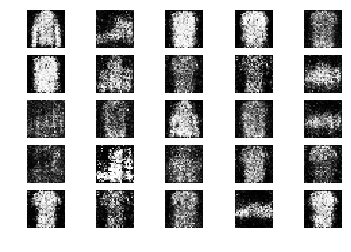

1251 [D loss: 0.571157, acc.: 64.06%] [G loss: 1.109326]
1252 [D loss: 0.519273, acc.: 82.81%] [G loss: 1.137790]
1253 [D loss: 0.653354, acc.: 60.94%] [G loss: 1.044629]
1254 [D loss: 0.599331, acc.: 65.62%] [G loss: 0.975925]
1255 [D loss: 0.548418, acc.: 68.75%] [G loss: 0.953747]
1256 [D loss: 0.552784, acc.: 68.75%] [G loss: 1.032747]
1257 [D loss: 0.546823, acc.: 73.44%] [G loss: 1.053344]
1258 [D loss: 0.565332, acc.: 73.44%] [G loss: 0.948931]
1259 [D loss: 0.544011, acc.: 70.31%] [G loss: 1.044993]
1260 [D loss: 0.594717, acc.: 62.50%] [G loss: 0.953915]
1261 [D loss: 0.626832, acc.: 60.94%] [G loss: 0.891668]
1262 [D loss: 0.585959, acc.: 71.88%] [G loss: 0.915060]
1263 [D loss: 0.659901, acc.: 59.38%] [G loss: 0.943341]
1264 [D loss: 0.612336, acc.: 60.94%] [G loss: 0.992456]
1265 [D loss: 0.608711, acc.: 60.94%] [G loss: 1.012419]
1266 [D loss: 0.576443, acc.: 64.06%] [G loss: 0.983948]
1267 [D loss: 0.513323, acc.: 78.12%] [G loss: 0.997901]
1268 [D loss: 0.613037, acc.: 6

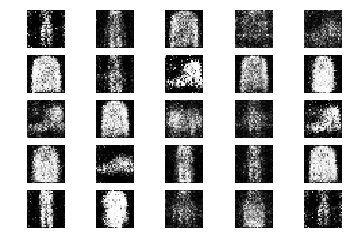

1301 [D loss: 0.586383, acc.: 70.31%] [G loss: 1.004862]
1302 [D loss: 0.647935, acc.: 56.25%] [G loss: 1.040897]
1303 [D loss: 0.560163, acc.: 75.00%] [G loss: 0.952672]
1304 [D loss: 0.612737, acc.: 64.06%] [G loss: 0.863007]
1305 [D loss: 0.680694, acc.: 59.38%] [G loss: 0.898284]
1306 [D loss: 0.569809, acc.: 73.44%] [G loss: 0.964914]
1307 [D loss: 0.613350, acc.: 64.06%] [G loss: 0.901587]
1308 [D loss: 0.642818, acc.: 65.62%] [G loss: 0.851917]
1309 [D loss: 0.672477, acc.: 56.25%] [G loss: 0.939851]
1310 [D loss: 0.643668, acc.: 65.62%] [G loss: 0.830871]
1311 [D loss: 0.690036, acc.: 53.12%] [G loss: 1.030910]
1312 [D loss: 0.634261, acc.: 59.38%] [G loss: 1.096245]
1313 [D loss: 0.547348, acc.: 78.12%] [G loss: 1.007524]
1314 [D loss: 0.598379, acc.: 73.44%] [G loss: 0.976651]
1315 [D loss: 0.630086, acc.: 64.06%] [G loss: 0.976442]
1316 [D loss: 0.685352, acc.: 59.38%] [G loss: 0.929732]
1317 [D loss: 0.616310, acc.: 59.38%] [G loss: 0.914310]
1318 [D loss: 0.627344, acc.: 6

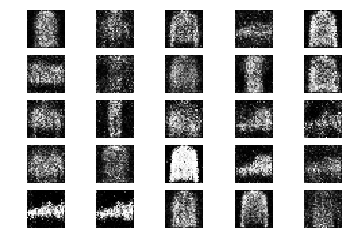

1351 [D loss: 0.635495, acc.: 64.06%] [G loss: 0.982951]
1352 [D loss: 0.604377, acc.: 67.19%] [G loss: 0.887058]
1353 [D loss: 0.599046, acc.: 65.62%] [G loss: 0.973433]
1354 [D loss: 0.619758, acc.: 64.06%] [G loss: 1.024230]
1355 [D loss: 0.620067, acc.: 59.38%] [G loss: 0.930682]
1356 [D loss: 0.590931, acc.: 67.19%] [G loss: 0.950158]
1357 [D loss: 0.613162, acc.: 62.50%] [G loss: 0.964903]
1358 [D loss: 0.619834, acc.: 65.62%] [G loss: 0.953142]
1359 [D loss: 0.600466, acc.: 70.31%] [G loss: 0.913804]
1360 [D loss: 0.644621, acc.: 60.94%] [G loss: 0.840246]
1361 [D loss: 0.606932, acc.: 67.19%] [G loss: 0.975111]
1362 [D loss: 0.648019, acc.: 68.75%] [G loss: 0.863992]
1363 [D loss: 0.624596, acc.: 70.31%] [G loss: 0.942259]
1364 [D loss: 0.602230, acc.: 64.06%] [G loss: 0.848843]
1365 [D loss: 0.611570, acc.: 62.50%] [G loss: 0.938868]
1366 [D loss: 0.626901, acc.: 62.50%] [G loss: 0.897942]
1367 [D loss: 0.635683, acc.: 67.19%] [G loss: 0.870397]
1368 [D loss: 0.599664, acc.: 6

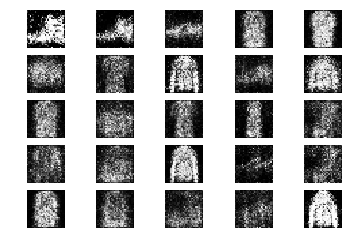

1401 [D loss: 0.546049, acc.: 79.69%] [G loss: 0.976383]
1402 [D loss: 0.593692, acc.: 65.62%] [G loss: 0.973049]
1403 [D loss: 0.661551, acc.: 64.06%] [G loss: 0.963528]
1404 [D loss: 0.622078, acc.: 64.06%] [G loss: 1.033572]
1405 [D loss: 0.524451, acc.: 79.69%] [G loss: 1.018095]
1406 [D loss: 0.592161, acc.: 67.19%] [G loss: 0.958432]
1407 [D loss: 0.653265, acc.: 60.94%] [G loss: 0.922843]
1408 [D loss: 0.654824, acc.: 57.81%] [G loss: 0.952593]
1409 [D loss: 0.616525, acc.: 67.19%] [G loss: 0.945037]
1410 [D loss: 0.631407, acc.: 62.50%] [G loss: 0.947310]
1411 [D loss: 0.621488, acc.: 62.50%] [G loss: 0.919304]
1412 [D loss: 0.601548, acc.: 64.06%] [G loss: 0.995038]
1413 [D loss: 0.631742, acc.: 62.50%] [G loss: 0.932809]
1414 [D loss: 0.616542, acc.: 64.06%] [G loss: 0.921081]
1415 [D loss: 0.616517, acc.: 59.38%] [G loss: 0.944027]
1416 [D loss: 0.549448, acc.: 71.88%] [G loss: 0.863036]
1417 [D loss: 0.548663, acc.: 76.56%] [G loss: 0.925730]
1418 [D loss: 0.578078, acc.: 6

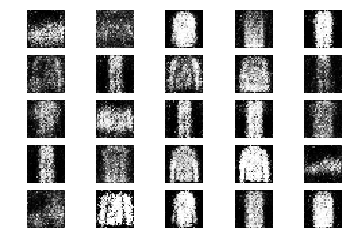

1451 [D loss: 0.635670, acc.: 67.19%] [G loss: 1.022586]
1452 [D loss: 0.592028, acc.: 65.62%] [G loss: 0.994634]
1453 [D loss: 0.623488, acc.: 67.19%] [G loss: 0.973091]
1454 [D loss: 0.587688, acc.: 70.31%] [G loss: 0.959710]
1455 [D loss: 0.676618, acc.: 54.69%] [G loss: 0.880000]
1456 [D loss: 0.688862, acc.: 56.25%] [G loss: 0.921330]
1457 [D loss: 0.657219, acc.: 60.94%] [G loss: 0.849403]
1458 [D loss: 0.650158, acc.: 59.38%] [G loss: 0.950807]
1459 [D loss: 0.593858, acc.: 65.62%] [G loss: 0.914648]
1460 [D loss: 0.604821, acc.: 62.50%] [G loss: 0.937979]
1461 [D loss: 0.687754, acc.: 54.69%] [G loss: 0.876121]
1462 [D loss: 0.645515, acc.: 60.94%] [G loss: 0.891210]
1463 [D loss: 0.578959, acc.: 64.06%] [G loss: 0.883200]
1464 [D loss: 0.603395, acc.: 64.06%] [G loss: 0.906720]
1465 [D loss: 0.668355, acc.: 62.50%] [G loss: 0.973489]
1466 [D loss: 0.604897, acc.: 65.62%] [G loss: 0.935259]
1467 [D loss: 0.628418, acc.: 56.25%] [G loss: 0.900181]
1468 [D loss: 0.516839, acc.: 7

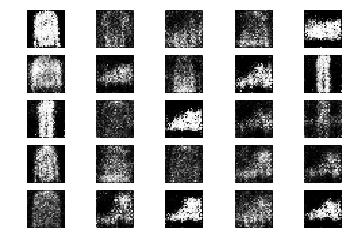

1501 [D loss: 0.602149, acc.: 64.06%] [G loss: 0.925423]
1502 [D loss: 0.633035, acc.: 60.94%] [G loss: 0.957975]
1503 [D loss: 0.670164, acc.: 60.94%] [G loss: 1.010919]
1504 [D loss: 0.621552, acc.: 65.62%] [G loss: 0.911567]
1505 [D loss: 0.595237, acc.: 64.06%] [G loss: 0.991637]
1506 [D loss: 0.704944, acc.: 54.69%] [G loss: 0.898121]
1507 [D loss: 0.636877, acc.: 65.62%] [G loss: 0.841662]
1508 [D loss: 0.703807, acc.: 53.12%] [G loss: 0.828180]
1509 [D loss: 0.611270, acc.: 70.31%] [G loss: 0.941940]
1510 [D loss: 0.551922, acc.: 81.25%] [G loss: 0.922059]
1511 [D loss: 0.551078, acc.: 81.25%] [G loss: 0.886595]
1512 [D loss: 0.566864, acc.: 78.12%] [G loss: 0.917252]
1513 [D loss: 0.657700, acc.: 59.38%] [G loss: 0.924070]
1514 [D loss: 0.620139, acc.: 67.19%] [G loss: 1.009210]
1515 [D loss: 0.694399, acc.: 53.12%] [G loss: 1.013827]
1516 [D loss: 0.644889, acc.: 54.69%] [G loss: 0.991188]
1517 [D loss: 0.531151, acc.: 78.12%] [G loss: 1.015694]
1518 [D loss: 0.626379, acc.: 6

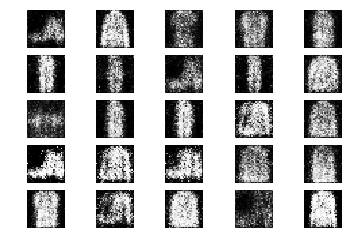

1551 [D loss: 0.588464, acc.: 70.31%] [G loss: 1.026661]
1552 [D loss: 0.605797, acc.: 67.19%] [G loss: 0.874433]
1553 [D loss: 0.686292, acc.: 54.69%] [G loss: 0.969647]
1554 [D loss: 0.607509, acc.: 68.75%] [G loss: 1.020549]
1555 [D loss: 0.590103, acc.: 68.75%] [G loss: 0.937465]
1556 [D loss: 0.641448, acc.: 65.62%] [G loss: 0.881964]
1557 [D loss: 0.619516, acc.: 65.62%] [G loss: 0.854291]
1558 [D loss: 0.633577, acc.: 68.75%] [G loss: 0.970871]
1559 [D loss: 0.606249, acc.: 67.19%] [G loss: 0.845483]
1560 [D loss: 0.614205, acc.: 64.06%] [G loss: 1.011331]
1561 [D loss: 0.580696, acc.: 71.88%] [G loss: 0.908450]
1562 [D loss: 0.644430, acc.: 70.31%] [G loss: 0.860707]
1563 [D loss: 0.601494, acc.: 64.06%] [G loss: 0.889083]
1564 [D loss: 0.608986, acc.: 68.75%] [G loss: 0.936586]
1565 [D loss: 0.573404, acc.: 70.31%] [G loss: 0.951942]
1566 [D loss: 0.603614, acc.: 71.88%] [G loss: 0.874608]
1567 [D loss: 0.676079, acc.: 53.12%] [G loss: 0.858542]
1568 [D loss: 0.610166, acc.: 6

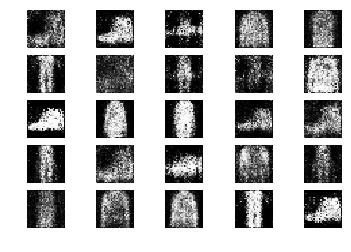

1601 [D loss: 0.582996, acc.: 73.44%] [G loss: 0.894305]
1602 [D loss: 0.634323, acc.: 64.06%] [G loss: 0.915449]
1603 [D loss: 0.641342, acc.: 64.06%] [G loss: 0.955627]
1604 [D loss: 0.629573, acc.: 70.31%] [G loss: 0.954410]
1605 [D loss: 0.624012, acc.: 67.19%] [G loss: 0.790314]
1606 [D loss: 0.583644, acc.: 67.19%] [G loss: 0.927456]
1607 [D loss: 0.716481, acc.: 60.94%] [G loss: 0.879464]
1608 [D loss: 0.607366, acc.: 62.50%] [G loss: 0.873600]
1609 [D loss: 0.609179, acc.: 60.94%] [G loss: 0.946926]
1610 [D loss: 0.545359, acc.: 75.00%] [G loss: 0.892844]
1611 [D loss: 0.644035, acc.: 56.25%] [G loss: 0.961654]
1612 [D loss: 0.615941, acc.: 65.62%] [G loss: 0.831143]
1613 [D loss: 0.657660, acc.: 59.38%] [G loss: 0.854604]
1614 [D loss: 0.623203, acc.: 68.75%] [G loss: 0.917591]
1615 [D loss: 0.636152, acc.: 67.19%] [G loss: 0.959638]
1616 [D loss: 0.588823, acc.: 68.75%] [G loss: 0.860794]
1617 [D loss: 0.628310, acc.: 54.69%] [G loss: 0.866365]
1618 [D loss: 0.590007, acc.: 7

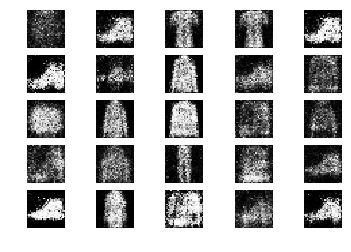

1651 [D loss: 0.668565, acc.: 53.12%] [G loss: 0.990648]
1652 [D loss: 0.657739, acc.: 54.69%] [G loss: 0.915499]
1653 [D loss: 0.654598, acc.: 62.50%] [G loss: 0.914383]
1654 [D loss: 0.599205, acc.: 71.88%] [G loss: 0.933770]
1655 [D loss: 0.536287, acc.: 76.56%] [G loss: 0.911447]
1656 [D loss: 0.646129, acc.: 62.50%] [G loss: 0.867532]
1657 [D loss: 0.645085, acc.: 62.50%] [G loss: 0.927397]
1658 [D loss: 0.612990, acc.: 68.75%] [G loss: 0.993219]
1659 [D loss: 0.615008, acc.: 70.31%] [G loss: 0.829272]
1660 [D loss: 0.638949, acc.: 67.19%] [G loss: 0.873070]
1661 [D loss: 0.680736, acc.: 54.69%] [G loss: 0.862477]
1662 [D loss: 0.599409, acc.: 68.75%] [G loss: 0.857522]
1663 [D loss: 0.613996, acc.: 57.81%] [G loss: 0.913305]
1664 [D loss: 0.621031, acc.: 71.88%] [G loss: 0.936247]
1665 [D loss: 0.677465, acc.: 57.81%] [G loss: 1.018479]
1666 [D loss: 0.519426, acc.: 84.38%] [G loss: 0.971032]
1667 [D loss: 0.645997, acc.: 57.81%] [G loss: 0.986151]
1668 [D loss: 0.627893, acc.: 6

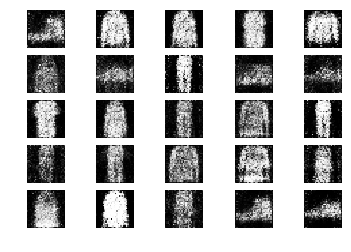

1701 [D loss: 0.679357, acc.: 57.81%] [G loss: 0.926256]
1702 [D loss: 0.677057, acc.: 51.56%] [G loss: 1.082028]
1703 [D loss: 0.588623, acc.: 68.75%] [G loss: 0.954291]
1704 [D loss: 0.608250, acc.: 65.62%] [G loss: 0.976478]
1705 [D loss: 0.622137, acc.: 68.75%] [G loss: 0.906413]
1706 [D loss: 0.600084, acc.: 67.19%] [G loss: 0.910187]
1707 [D loss: 0.655013, acc.: 67.19%] [G loss: 0.974738]
1708 [D loss: 0.648086, acc.: 54.69%] [G loss: 0.929390]
1709 [D loss: 0.633033, acc.: 62.50%] [G loss: 0.883793]
1710 [D loss: 0.665213, acc.: 64.06%] [G loss: 0.925483]
1711 [D loss: 0.627555, acc.: 59.38%] [G loss: 0.946077]
1712 [D loss: 0.631245, acc.: 68.75%] [G loss: 0.907084]
1713 [D loss: 0.628961, acc.: 60.94%] [G loss: 0.958484]
1714 [D loss: 0.632498, acc.: 62.50%] [G loss: 0.900755]
1715 [D loss: 0.611790, acc.: 65.62%] [G loss: 0.877037]
1716 [D loss: 0.615715, acc.: 67.19%] [G loss: 0.981366]
1717 [D loss: 0.658132, acc.: 60.94%] [G loss: 0.879948]
1718 [D loss: 0.623150, acc.: 6

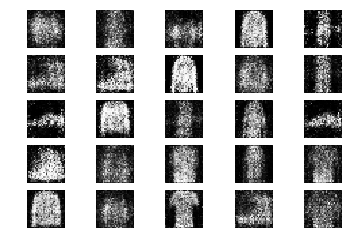

1751 [D loss: 0.587428, acc.: 65.62%] [G loss: 0.948859]
1752 [D loss: 0.617765, acc.: 65.62%] [G loss: 0.932683]
1753 [D loss: 0.616355, acc.: 67.19%] [G loss: 0.884204]
1754 [D loss: 0.630533, acc.: 65.62%] [G loss: 0.913643]
1755 [D loss: 0.633348, acc.: 64.06%] [G loss: 0.918051]
1756 [D loss: 0.634154, acc.: 59.38%] [G loss: 0.897001]
1757 [D loss: 0.579216, acc.: 71.88%] [G loss: 0.884025]
1758 [D loss: 0.637694, acc.: 59.38%] [G loss: 0.848066]
1759 [D loss: 0.546475, acc.: 67.19%] [G loss: 0.984018]
1760 [D loss: 0.591481, acc.: 67.19%] [G loss: 0.900098]
1761 [D loss: 0.654747, acc.: 59.38%] [G loss: 0.883608]
1762 [D loss: 0.611633, acc.: 64.06%] [G loss: 0.929732]
1763 [D loss: 0.631678, acc.: 65.62%] [G loss: 0.921446]
1764 [D loss: 0.625112, acc.: 64.06%] [G loss: 0.862642]
1765 [D loss: 0.616356, acc.: 64.06%] [G loss: 0.915744]
1766 [D loss: 0.653832, acc.: 60.94%] [G loss: 0.919208]
1767 [D loss: 0.726868, acc.: 54.69%] [G loss: 0.879358]
1768 [D loss: 0.569736, acc.: 7

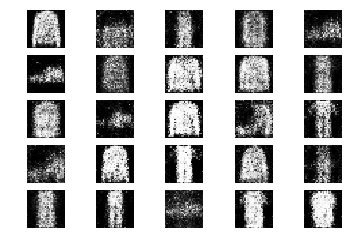

1801 [D loss: 0.603041, acc.: 73.44%] [G loss: 0.948819]
1802 [D loss: 0.677172, acc.: 54.69%] [G loss: 0.893704]
1803 [D loss: 0.617129, acc.: 65.62%] [G loss: 0.939444]
1804 [D loss: 0.616601, acc.: 65.62%] [G loss: 0.929687]
1805 [D loss: 0.639144, acc.: 54.69%] [G loss: 0.895231]
1806 [D loss: 0.536576, acc.: 70.31%] [G loss: 1.004414]
1807 [D loss: 0.664926, acc.: 65.62%] [G loss: 1.034718]
1808 [D loss: 0.639681, acc.: 64.06%] [G loss: 0.978812]
1809 [D loss: 0.552765, acc.: 71.88%] [G loss: 0.947782]
1810 [D loss: 0.593669, acc.: 70.31%] [G loss: 0.932230]
1811 [D loss: 0.607051, acc.: 70.31%] [G loss: 0.928864]
1812 [D loss: 0.578475, acc.: 78.12%] [G loss: 0.908564]
1813 [D loss: 0.633970, acc.: 65.62%] [G loss: 1.036658]
1814 [D loss: 0.569508, acc.: 62.50%] [G loss: 0.996747]
1815 [D loss: 0.617172, acc.: 60.94%] [G loss: 0.965386]
1816 [D loss: 0.595661, acc.: 67.19%] [G loss: 1.024143]
1817 [D loss: 0.661327, acc.: 54.69%] [G loss: 0.836221]
1818 [D loss: 0.640372, acc.: 6

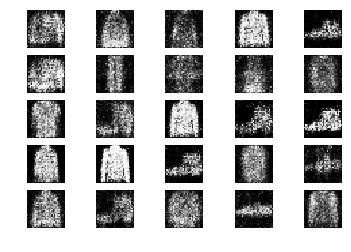

1851 [D loss: 0.641327, acc.: 59.38%] [G loss: 0.955859]
1852 [D loss: 0.559384, acc.: 71.88%] [G loss: 0.983352]
1853 [D loss: 0.638504, acc.: 53.12%] [G loss: 1.010666]
1854 [D loss: 0.702516, acc.: 60.94%] [G loss: 0.855454]
1855 [D loss: 0.600249, acc.: 70.31%] [G loss: 0.912777]
1856 [D loss: 0.595623, acc.: 67.19%] [G loss: 0.951778]
1857 [D loss: 0.608621, acc.: 59.38%] [G loss: 0.890000]
1858 [D loss: 0.563981, acc.: 68.75%] [G loss: 0.896103]
1859 [D loss: 0.586801, acc.: 71.88%] [G loss: 0.955230]
1860 [D loss: 0.642132, acc.: 56.25%] [G loss: 0.905526]
1861 [D loss: 0.650195, acc.: 57.81%] [G loss: 0.954021]
1862 [D loss: 0.665260, acc.: 62.50%] [G loss: 0.939277]
1863 [D loss: 0.592590, acc.: 70.31%] [G loss: 0.973100]
1864 [D loss: 0.615545, acc.: 70.31%] [G loss: 0.993495]
1865 [D loss: 0.694302, acc.: 59.38%] [G loss: 0.894665]
1866 [D loss: 0.540652, acc.: 79.69%] [G loss: 1.070315]
1867 [D loss: 0.622398, acc.: 68.75%] [G loss: 0.986699]
1868 [D loss: 0.603821, acc.: 7

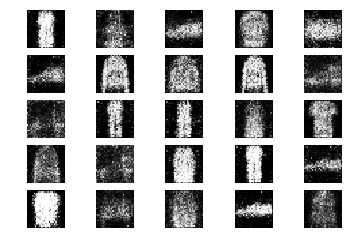

1901 [D loss: 0.621451, acc.: 67.19%] [G loss: 0.887968]
1902 [D loss: 0.615961, acc.: 65.62%] [G loss: 0.852870]
1903 [D loss: 0.657947, acc.: 60.94%] [G loss: 0.916089]
1904 [D loss: 0.571904, acc.: 73.44%] [G loss: 0.874242]
1905 [D loss: 0.581690, acc.: 71.88%] [G loss: 0.861123]
1906 [D loss: 0.662487, acc.: 64.06%] [G loss: 0.949319]
1907 [D loss: 0.592718, acc.: 68.75%] [G loss: 0.819809]
1908 [D loss: 0.563885, acc.: 65.62%] [G loss: 1.016463]
1909 [D loss: 0.609260, acc.: 70.31%] [G loss: 1.044569]
1910 [D loss: 0.602979, acc.: 64.06%] [G loss: 0.905573]
1911 [D loss: 0.600970, acc.: 73.44%] [G loss: 0.903870]
1912 [D loss: 0.607553, acc.: 59.38%] [G loss: 0.952105]
1913 [D loss: 0.616613, acc.: 70.31%] [G loss: 0.995252]
1914 [D loss: 0.567610, acc.: 70.31%] [G loss: 1.006082]
1915 [D loss: 0.621260, acc.: 60.94%] [G loss: 0.939385]
1916 [D loss: 0.579430, acc.: 68.75%] [G loss: 0.911665]
1917 [D loss: 0.572761, acc.: 71.88%] [G loss: 0.989728]
1918 [D loss: 0.588057, acc.: 6

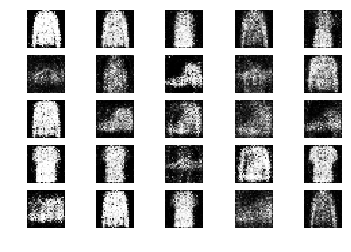

1951 [D loss: 0.544973, acc.: 70.31%] [G loss: 0.957204]
1952 [D loss: 0.616379, acc.: 60.94%] [G loss: 0.909997]
1953 [D loss: 0.576492, acc.: 70.31%] [G loss: 0.982731]
1954 [D loss: 0.579515, acc.: 64.06%] [G loss: 0.992184]
1955 [D loss: 0.652926, acc.: 54.69%] [G loss: 0.989367]
1956 [D loss: 0.587281, acc.: 64.06%] [G loss: 1.026420]
1957 [D loss: 0.584760, acc.: 65.62%] [G loss: 1.001441]
1958 [D loss: 0.581526, acc.: 65.62%] [G loss: 1.014157]
1959 [D loss: 0.562607, acc.: 73.44%] [G loss: 1.045382]
1960 [D loss: 0.632791, acc.: 65.62%] [G loss: 0.902995]
1961 [D loss: 0.606398, acc.: 67.19%] [G loss: 0.954899]
1962 [D loss: 0.637585, acc.: 62.50%] [G loss: 0.987890]
1963 [D loss: 0.607184, acc.: 71.88%] [G loss: 0.874103]
1964 [D loss: 0.629072, acc.: 67.19%] [G loss: 0.910553]
1965 [D loss: 0.558061, acc.: 68.75%] [G loss: 0.919259]
1966 [D loss: 0.610274, acc.: 60.94%] [G loss: 0.980247]
1967 [D loss: 0.621303, acc.: 67.19%] [G loss: 0.995250]
1968 [D loss: 0.816217, acc.: 5

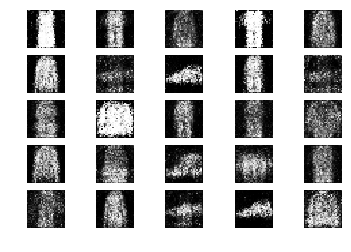

2001 [D loss: 0.564236, acc.: 70.31%] [G loss: 0.999050]
2002 [D loss: 0.671800, acc.: 62.50%] [G loss: 1.014100]
2003 [D loss: 0.605623, acc.: 64.06%] [G loss: 0.916975]
2004 [D loss: 0.544692, acc.: 70.31%] [G loss: 0.932567]
2005 [D loss: 0.578225, acc.: 65.62%] [G loss: 1.043009]
2006 [D loss: 0.606049, acc.: 64.06%] [G loss: 1.021907]
2007 [D loss: 0.559224, acc.: 71.88%] [G loss: 0.929965]
2008 [D loss: 0.658703, acc.: 57.81%] [G loss: 0.974580]
2009 [D loss: 0.596823, acc.: 65.62%] [G loss: 0.968092]
2010 [D loss: 0.674379, acc.: 54.69%] [G loss: 0.943824]
2011 [D loss: 0.670579, acc.: 57.81%] [G loss: 1.104122]
2012 [D loss: 0.601311, acc.: 70.31%] [G loss: 0.998269]
2013 [D loss: 0.583202, acc.: 71.88%] [G loss: 0.997403]
2014 [D loss: 0.599532, acc.: 70.31%] [G loss: 0.892965]
2015 [D loss: 0.584012, acc.: 70.31%] [G loss: 0.928612]
2016 [D loss: 0.607057, acc.: 65.62%] [G loss: 0.933906]
2017 [D loss: 0.636176, acc.: 64.06%] [G loss: 1.008197]
2018 [D loss: 0.614935, acc.: 6

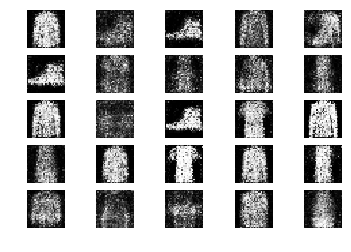

2051 [D loss: 0.661369, acc.: 57.81%] [G loss: 1.014199]
2052 [D loss: 0.622907, acc.: 62.50%] [G loss: 1.038110]
2053 [D loss: 0.621217, acc.: 62.50%] [G loss: 1.065318]
2054 [D loss: 0.505476, acc.: 78.12%] [G loss: 1.054344]
2055 [D loss: 0.583004, acc.: 75.00%] [G loss: 1.121780]
2056 [D loss: 0.550073, acc.: 73.44%] [G loss: 1.076142]
2057 [D loss: 0.662611, acc.: 56.25%] [G loss: 1.100705]
2058 [D loss: 0.683883, acc.: 53.12%] [G loss: 1.031724]
2059 [D loss: 0.578192, acc.: 67.19%] [G loss: 0.861403]
2060 [D loss: 0.599847, acc.: 67.19%] [G loss: 0.832976]
2061 [D loss: 0.582427, acc.: 73.44%] [G loss: 0.929754]
2062 [D loss: 0.568691, acc.: 67.19%] [G loss: 0.983127]
2063 [D loss: 0.581441, acc.: 67.19%] [G loss: 0.969837]
2064 [D loss: 0.697288, acc.: 59.38%] [G loss: 1.010815]
2065 [D loss: 0.666850, acc.: 59.38%] [G loss: 0.873853]
2066 [D loss: 0.583817, acc.: 70.31%] [G loss: 0.970215]
2067 [D loss: 0.586379, acc.: 70.31%] [G loss: 0.979527]
2068 [D loss: 0.638188, acc.: 6

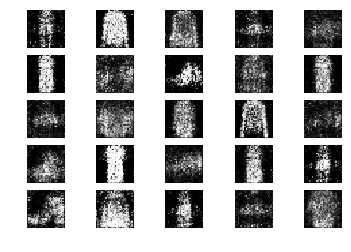

2101 [D loss: 0.669849, acc.: 57.81%] [G loss: 0.967439]
2102 [D loss: 0.605485, acc.: 67.19%] [G loss: 0.879227]
2103 [D loss: 0.597807, acc.: 68.75%] [G loss: 0.924093]
2104 [D loss: 0.642774, acc.: 64.06%] [G loss: 0.967896]
2105 [D loss: 0.575390, acc.: 75.00%] [G loss: 0.970690]
2106 [D loss: 0.578791, acc.: 75.00%] [G loss: 1.013538]
2107 [D loss: 0.691799, acc.: 53.12%] [G loss: 0.971890]
2108 [D loss: 0.651989, acc.: 56.25%] [G loss: 0.967056]
2109 [D loss: 0.665979, acc.: 56.25%] [G loss: 0.911368]
2110 [D loss: 0.607443, acc.: 62.50%] [G loss: 0.966501]
2111 [D loss: 0.579164, acc.: 65.62%] [G loss: 0.923040]
2112 [D loss: 0.614347, acc.: 62.50%] [G loss: 0.959928]
2113 [D loss: 0.633626, acc.: 62.50%] [G loss: 0.995327]
2114 [D loss: 0.642538, acc.: 62.50%] [G loss: 0.964724]
2115 [D loss: 0.599335, acc.: 62.50%] [G loss: 1.096755]
2116 [D loss: 0.630448, acc.: 64.06%] [G loss: 0.921436]
2117 [D loss: 0.647147, acc.: 71.88%] [G loss: 0.992175]
2118 [D loss: 0.606574, acc.: 6

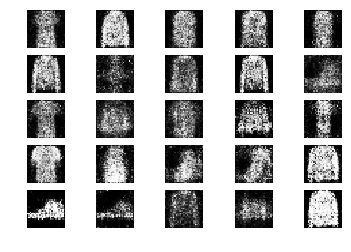

2151 [D loss: 0.568932, acc.: 68.75%] [G loss: 0.956775]
2152 [D loss: 0.582376, acc.: 56.25%] [G loss: 1.046028]
2153 [D loss: 0.612027, acc.: 65.62%] [G loss: 0.926479]
2154 [D loss: 0.535017, acc.: 73.44%] [G loss: 0.927491]
2155 [D loss: 0.642324, acc.: 60.94%] [G loss: 0.982033]
2156 [D loss: 0.606551, acc.: 67.19%] [G loss: 0.920945]
2157 [D loss: 0.586338, acc.: 68.75%] [G loss: 1.018518]
2158 [D loss: 0.578245, acc.: 73.44%] [G loss: 1.033048]
2159 [D loss: 0.608957, acc.: 68.75%] [G loss: 0.994749]
2160 [D loss: 0.657034, acc.: 59.38%] [G loss: 0.947581]
2161 [D loss: 0.605852, acc.: 70.31%] [G loss: 0.917156]
2162 [D loss: 0.685973, acc.: 46.88%] [G loss: 0.864525]
2163 [D loss: 0.646742, acc.: 65.62%] [G loss: 0.926875]
2164 [D loss: 0.668015, acc.: 64.06%] [G loss: 0.998685]
2165 [D loss: 0.623010, acc.: 64.06%] [G loss: 1.043382]
2166 [D loss: 0.584408, acc.: 71.88%] [G loss: 0.918619]
2167 [D loss: 0.601220, acc.: 70.31%] [G loss: 0.984492]
2168 [D loss: 0.712875, acc.: 5

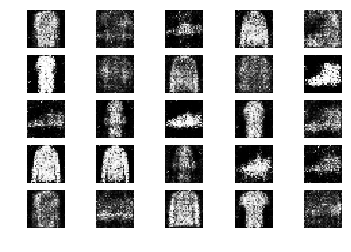

2201 [D loss: 0.585041, acc.: 71.88%] [G loss: 0.970778]
2202 [D loss: 0.592380, acc.: 65.62%] [G loss: 1.033536]
2203 [D loss: 0.566130, acc.: 62.50%] [G loss: 0.931275]
2204 [D loss: 0.582831, acc.: 65.62%] [G loss: 1.034760]
2205 [D loss: 0.633535, acc.: 65.62%] [G loss: 0.908349]
2206 [D loss: 0.619949, acc.: 64.06%] [G loss: 0.946270]
2207 [D loss: 0.567987, acc.: 62.50%] [G loss: 0.887269]
2208 [D loss: 0.629254, acc.: 62.50%] [G loss: 0.937679]
2209 [D loss: 0.638298, acc.: 65.62%] [G loss: 0.924523]
2210 [D loss: 0.541019, acc.: 75.00%] [G loss: 0.915902]
2211 [D loss: 0.592400, acc.: 57.81%] [G loss: 0.949011]
2212 [D loss: 0.688371, acc.: 53.12%] [G loss: 1.023438]
2213 [D loss: 0.595656, acc.: 68.75%] [G loss: 0.899548]
2214 [D loss: 0.711666, acc.: 60.94%] [G loss: 1.052352]
2215 [D loss: 0.606899, acc.: 65.62%] [G loss: 0.974467]
2216 [D loss: 0.729445, acc.: 60.94%] [G loss: 0.997565]
2217 [D loss: 0.551449, acc.: 75.00%] [G loss: 1.028842]
2218 [D loss: 0.652291, acc.: 5

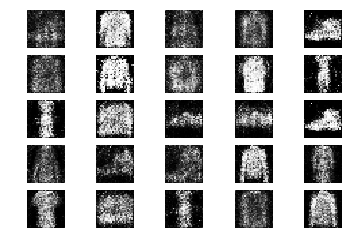

2251 [D loss: 0.640614, acc.: 57.81%] [G loss: 0.939304]
2252 [D loss: 0.662553, acc.: 59.38%] [G loss: 0.961064]
2253 [D loss: 0.632112, acc.: 64.06%] [G loss: 0.914938]
2254 [D loss: 0.576768, acc.: 76.56%] [G loss: 0.978385]
2255 [D loss: 0.556232, acc.: 75.00%] [G loss: 0.962615]
2256 [D loss: 0.592293, acc.: 60.94%] [G loss: 0.963011]
2257 [D loss: 0.551982, acc.: 73.44%] [G loss: 1.073483]
2258 [D loss: 0.708152, acc.: 54.69%] [G loss: 0.996694]
2259 [D loss: 0.606776, acc.: 68.75%] [G loss: 0.848405]
2260 [D loss: 0.614563, acc.: 65.62%] [G loss: 0.963105]
2261 [D loss: 0.573401, acc.: 68.75%] [G loss: 0.927980]
2262 [D loss: 0.676169, acc.: 57.81%] [G loss: 0.889644]
2263 [D loss: 0.639064, acc.: 60.94%] [G loss: 0.855129]
2264 [D loss: 0.537363, acc.: 79.69%] [G loss: 0.957689]
2265 [D loss: 0.626748, acc.: 67.19%] [G loss: 0.999907]
2266 [D loss: 0.610073, acc.: 64.06%] [G loss: 1.035817]
2267 [D loss: 0.632921, acc.: 62.50%] [G loss: 0.903206]
2268 [D loss: 0.601649, acc.: 6

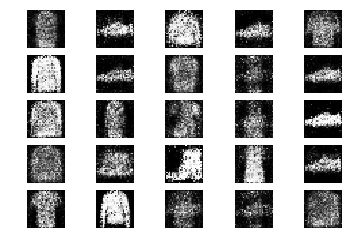

2301 [D loss: 0.601734, acc.: 64.06%] [G loss: 0.894735]
2302 [D loss: 0.612105, acc.: 65.62%] [G loss: 0.858934]
2303 [D loss: 0.628883, acc.: 60.94%] [G loss: 1.011410]
2304 [D loss: 0.555011, acc.: 76.56%] [G loss: 0.931710]
2305 [D loss: 0.589738, acc.: 65.62%] [G loss: 1.032532]
2306 [D loss: 0.682935, acc.: 54.69%] [G loss: 0.911734]
2307 [D loss: 0.659275, acc.: 53.12%] [G loss: 0.848015]
2308 [D loss: 0.598399, acc.: 60.94%] [G loss: 0.898324]
2309 [D loss: 0.654449, acc.: 57.81%] [G loss: 1.001143]
2310 [D loss: 0.624366, acc.: 65.62%] [G loss: 0.982003]
2311 [D loss: 0.628978, acc.: 60.94%] [G loss: 0.979087]
2312 [D loss: 0.639181, acc.: 64.06%] [G loss: 1.018033]
2313 [D loss: 0.603010, acc.: 67.19%] [G loss: 1.019075]
2314 [D loss: 0.669567, acc.: 59.38%] [G loss: 0.940782]
2315 [D loss: 0.628819, acc.: 60.94%] [G loss: 0.875542]
2316 [D loss: 0.638562, acc.: 59.38%] [G loss: 0.971632]
2317 [D loss: 0.579498, acc.: 68.75%] [G loss: 0.949790]
2318 [D loss: 0.652481, acc.: 5

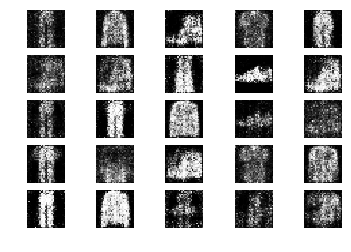

2351 [D loss: 0.617892, acc.: 60.94%] [G loss: 0.879369]
2352 [D loss: 0.596979, acc.: 67.19%] [G loss: 0.946181]
2353 [D loss: 0.620230, acc.: 59.38%] [G loss: 0.974063]
2354 [D loss: 0.587348, acc.: 57.81%] [G loss: 1.061406]
2355 [D loss: 0.566797, acc.: 71.88%] [G loss: 0.923879]
2356 [D loss: 0.666051, acc.: 62.50%] [G loss: 0.991041]
2357 [D loss: 0.646830, acc.: 67.19%] [G loss: 0.942963]
2358 [D loss: 0.622577, acc.: 60.94%] [G loss: 1.008262]
2359 [D loss: 0.591527, acc.: 71.88%] [G loss: 0.938028]
2360 [D loss: 0.645082, acc.: 64.06%] [G loss: 1.015355]
2361 [D loss: 0.571843, acc.: 68.75%] [G loss: 1.096076]
2362 [D loss: 0.689941, acc.: 57.81%] [G loss: 0.960032]
2363 [D loss: 0.563437, acc.: 75.00%] [G loss: 1.057579]
2364 [D loss: 0.639992, acc.: 67.19%] [G loss: 1.010514]
2365 [D loss: 0.591140, acc.: 67.19%] [G loss: 0.990654]
2366 [D loss: 0.612016, acc.: 65.62%] [G loss: 1.041064]
2367 [D loss: 0.660248, acc.: 57.81%] [G loss: 1.048849]
2368 [D loss: 0.686466, acc.: 5

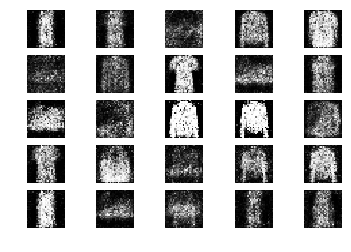

2401 [D loss: 0.644784, acc.: 64.06%] [G loss: 0.897200]
2402 [D loss: 0.644520, acc.: 64.06%] [G loss: 0.930613]
2403 [D loss: 0.596838, acc.: 67.19%] [G loss: 0.985618]
2404 [D loss: 0.669698, acc.: 54.69%] [G loss: 0.930688]
2405 [D loss: 0.597146, acc.: 60.94%] [G loss: 1.007614]
2406 [D loss: 0.561163, acc.: 70.31%] [G loss: 1.041785]
2407 [D loss: 0.654762, acc.: 57.81%] [G loss: 1.026758]
2408 [D loss: 0.543571, acc.: 73.44%] [G loss: 0.980479]
2409 [D loss: 0.628129, acc.: 65.62%] [G loss: 1.078649]
2410 [D loss: 0.652829, acc.: 59.38%] [G loss: 1.054488]
2411 [D loss: 0.611672, acc.: 67.19%] [G loss: 1.006686]
2412 [D loss: 0.606959, acc.: 73.44%] [G loss: 0.940107]
2413 [D loss: 0.610813, acc.: 68.75%] [G loss: 0.962408]
2414 [D loss: 0.637924, acc.: 60.94%] [G loss: 0.998387]
2415 [D loss: 0.646038, acc.: 57.81%] [G loss: 1.005522]
2416 [D loss: 0.657090, acc.: 53.12%] [G loss: 0.995137]
2417 [D loss: 0.572494, acc.: 75.00%] [G loss: 1.052776]
2418 [D loss: 0.683041, acc.: 5

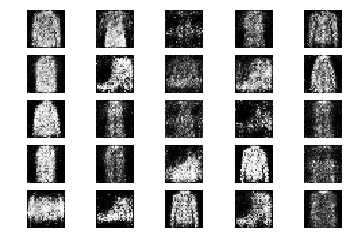

2451 [D loss: 0.697460, acc.: 56.25%] [G loss: 0.971401]
2452 [D loss: 0.582109, acc.: 70.31%] [G loss: 0.966414]
2453 [D loss: 0.624305, acc.: 62.50%] [G loss: 0.964529]
2454 [D loss: 0.704048, acc.: 57.81%] [G loss: 0.933454]
2455 [D loss: 0.583340, acc.: 73.44%] [G loss: 1.006814]
2456 [D loss: 0.673431, acc.: 57.81%] [G loss: 1.004524]
2457 [D loss: 0.628041, acc.: 60.94%] [G loss: 1.036954]
2458 [D loss: 0.657391, acc.: 67.19%] [G loss: 0.991008]
2459 [D loss: 0.555494, acc.: 73.44%] [G loss: 0.979890]
2460 [D loss: 0.552177, acc.: 75.00%] [G loss: 0.965419]
2461 [D loss: 0.697685, acc.: 50.00%] [G loss: 0.988552]
2462 [D loss: 0.647710, acc.: 65.62%] [G loss: 1.015065]
2463 [D loss: 0.589422, acc.: 76.56%] [G loss: 1.007536]
2464 [D loss: 0.634058, acc.: 60.94%] [G loss: 0.995411]
2465 [D loss: 0.722004, acc.: 62.50%] [G loss: 0.949115]
2466 [D loss: 0.657289, acc.: 64.06%] [G loss: 0.894924]
2467 [D loss: 0.620327, acc.: 70.31%] [G loss: 0.944021]
2468 [D loss: 0.594678, acc.: 7

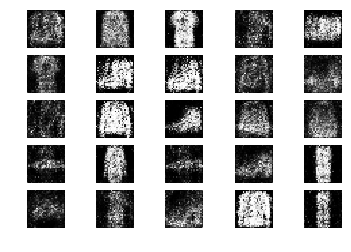

2501 [D loss: 0.574745, acc.: 75.00%] [G loss: 1.039977]
2502 [D loss: 0.631219, acc.: 59.38%] [G loss: 0.959722]
2503 [D loss: 0.623986, acc.: 57.81%] [G loss: 0.937938]
2504 [D loss: 0.653480, acc.: 65.62%] [G loss: 0.983452]
2505 [D loss: 0.682208, acc.: 57.81%] [G loss: 1.008192]
2506 [D loss: 0.630729, acc.: 62.50%] [G loss: 0.940044]
2507 [D loss: 0.635598, acc.: 60.94%] [G loss: 1.037657]
2508 [D loss: 0.637704, acc.: 59.38%] [G loss: 0.935168]
2509 [D loss: 0.582173, acc.: 71.88%] [G loss: 0.961628]
2510 [D loss: 0.755890, acc.: 43.75%] [G loss: 1.016763]
2511 [D loss: 0.558227, acc.: 73.44%] [G loss: 0.957800]
2512 [D loss: 0.586032, acc.: 67.19%] [G loss: 1.041718]
2513 [D loss: 0.645786, acc.: 64.06%] [G loss: 0.951932]
2514 [D loss: 0.603831, acc.: 71.88%] [G loss: 0.917259]
2515 [D loss: 0.555289, acc.: 76.56%] [G loss: 0.957866]
2516 [D loss: 0.584229, acc.: 62.50%] [G loss: 0.861484]
2517 [D loss: 0.557794, acc.: 67.19%] [G loss: 0.983950]
2518 [D loss: 0.698386, acc.: 5

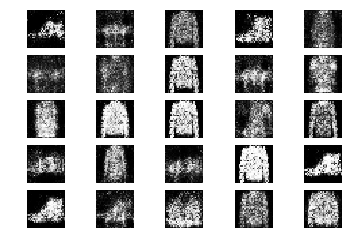

2551 [D loss: 0.629116, acc.: 60.94%] [G loss: 1.050202]
2552 [D loss: 0.606926, acc.: 73.44%] [G loss: 0.921935]
2553 [D loss: 0.546439, acc.: 67.19%] [G loss: 1.010221]
2554 [D loss: 0.647883, acc.: 56.25%] [G loss: 0.909244]
2555 [D loss: 0.528904, acc.: 71.88%] [G loss: 1.031146]
2556 [D loss: 0.654351, acc.: 64.06%] [G loss: 0.925232]
2557 [D loss: 0.673330, acc.: 54.69%] [G loss: 0.928625]
2558 [D loss: 0.662950, acc.: 50.00%] [G loss: 0.986042]
2559 [D loss: 0.697680, acc.: 54.69%] [G loss: 1.021365]
2560 [D loss: 0.560443, acc.: 76.56%] [G loss: 0.927038]
2561 [D loss: 0.531530, acc.: 73.44%] [G loss: 0.891523]
2562 [D loss: 0.687899, acc.: 50.00%] [G loss: 0.952433]
2563 [D loss: 0.638641, acc.: 62.50%] [G loss: 0.932514]
2564 [D loss: 0.652916, acc.: 59.38%] [G loss: 0.919372]
2565 [D loss: 0.628575, acc.: 64.06%] [G loss: 0.909673]
2566 [D loss: 0.632203, acc.: 54.69%] [G loss: 0.947423]
2567 [D loss: 0.643070, acc.: 62.50%] [G loss: 0.990237]
2568 [D loss: 0.602864, acc.: 6

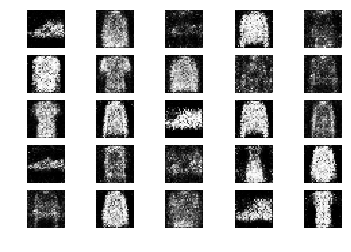

2601 [D loss: 0.617602, acc.: 67.19%] [G loss: 0.973496]
2602 [D loss: 0.608018, acc.: 64.06%] [G loss: 0.914062]
2603 [D loss: 0.638608, acc.: 60.94%] [G loss: 0.990608]
2604 [D loss: 0.652714, acc.: 57.81%] [G loss: 0.850850]
2605 [D loss: 0.531435, acc.: 78.12%] [G loss: 1.010404]
2606 [D loss: 0.670835, acc.: 53.12%] [G loss: 1.079201]
2607 [D loss: 0.589743, acc.: 75.00%] [G loss: 0.965190]
2608 [D loss: 0.543656, acc.: 76.56%] [G loss: 1.069784]
2609 [D loss: 0.542556, acc.: 76.56%] [G loss: 1.023417]
2610 [D loss: 0.563887, acc.: 70.31%] [G loss: 1.090225]
2611 [D loss: 0.606473, acc.: 62.50%] [G loss: 1.006764]
2612 [D loss: 0.577619, acc.: 70.31%] [G loss: 0.927292]
2613 [D loss: 0.592789, acc.: 67.19%] [G loss: 1.013851]
2614 [D loss: 0.643669, acc.: 60.94%] [G loss: 0.996896]
2615 [D loss: 0.620662, acc.: 57.81%] [G loss: 0.983617]
2616 [D loss: 0.610481, acc.: 64.06%] [G loss: 0.878131]
2617 [D loss: 0.522656, acc.: 81.25%] [G loss: 0.851402]
2618 [D loss: 0.641918, acc.: 6

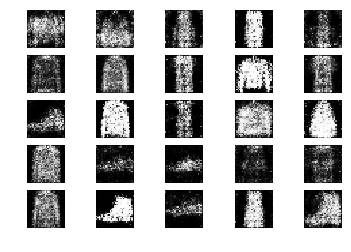

2651 [D loss: 0.679600, acc.: 54.69%] [G loss: 0.958727]
2652 [D loss: 0.639467, acc.: 59.38%] [G loss: 0.821698]
2653 [D loss: 0.563646, acc.: 75.00%] [G loss: 1.001068]
2654 [D loss: 0.589347, acc.: 60.94%] [G loss: 1.042095]
2655 [D loss: 0.618496, acc.: 60.94%] [G loss: 1.021641]
2656 [D loss: 0.640548, acc.: 59.38%] [G loss: 1.078491]
2657 [D loss: 0.541491, acc.: 76.56%] [G loss: 1.018578]
2658 [D loss: 0.608275, acc.: 60.94%] [G loss: 0.988874]
2659 [D loss: 0.603120, acc.: 60.94%] [G loss: 0.958118]
2660 [D loss: 0.550346, acc.: 76.56%] [G loss: 0.878106]
2661 [D loss: 0.584896, acc.: 67.19%] [G loss: 0.986740]
2662 [D loss: 0.619583, acc.: 67.19%] [G loss: 1.019876]
2663 [D loss: 0.597527, acc.: 71.88%] [G loss: 0.929766]
2664 [D loss: 0.568366, acc.: 76.56%] [G loss: 0.900706]
2665 [D loss: 0.558433, acc.: 76.56%] [G loss: 0.944772]
2666 [D loss: 0.682131, acc.: 57.81%] [G loss: 0.910355]
2667 [D loss: 0.599678, acc.: 65.62%] [G loss: 0.973460]
2668 [D loss: 0.682430, acc.: 6

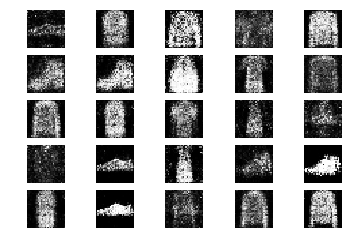

2701 [D loss: 0.687730, acc.: 56.25%] [G loss: 0.915752]
2702 [D loss: 0.574144, acc.: 64.06%] [G loss: 0.999590]
2703 [D loss: 0.612754, acc.: 65.62%] [G loss: 0.933312]
2704 [D loss: 0.675256, acc.: 59.38%] [G loss: 0.941437]
2705 [D loss: 0.701629, acc.: 56.25%] [G loss: 0.979158]
2706 [D loss: 0.663050, acc.: 54.69%] [G loss: 1.016089]
2707 [D loss: 0.585487, acc.: 68.75%] [G loss: 1.022943]
2708 [D loss: 0.657225, acc.: 57.81%] [G loss: 1.018731]
2709 [D loss: 0.610522, acc.: 62.50%] [G loss: 1.000215]
2710 [D loss: 0.501723, acc.: 79.69%] [G loss: 1.016330]
2711 [D loss: 0.645336, acc.: 65.62%] [G loss: 0.991573]
2712 [D loss: 0.613753, acc.: 70.31%] [G loss: 0.922251]
2713 [D loss: 0.602655, acc.: 64.06%] [G loss: 0.992550]
2714 [D loss: 0.634985, acc.: 64.06%] [G loss: 0.905350]
2715 [D loss: 0.616306, acc.: 68.75%] [G loss: 0.872308]
2716 [D loss: 0.688308, acc.: 51.56%] [G loss: 1.043045]
2717 [D loss: 0.641924, acc.: 54.69%] [G loss: 1.069962]
2718 [D loss: 0.690731, acc.: 5

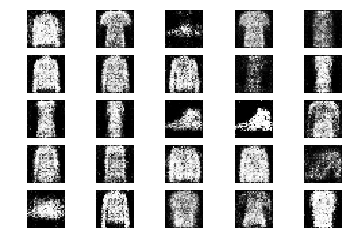

2751 [D loss: 0.595952, acc.: 60.94%] [G loss: 0.913493]
2752 [D loss: 0.584171, acc.: 67.19%] [G loss: 0.986495]
2753 [D loss: 0.674606, acc.: 57.81%] [G loss: 0.977062]
2754 [D loss: 0.593968, acc.: 68.75%] [G loss: 0.917804]
2755 [D loss: 0.580213, acc.: 73.44%] [G loss: 1.032357]
2756 [D loss: 0.648440, acc.: 59.38%] [G loss: 0.831119]
2757 [D loss: 0.570448, acc.: 67.19%] [G loss: 0.920788]
2758 [D loss: 0.654419, acc.: 62.50%] [G loss: 0.922459]
2759 [D loss: 0.641776, acc.: 59.38%] [G loss: 0.882779]
2760 [D loss: 0.668737, acc.: 57.81%] [G loss: 1.069789]
2761 [D loss: 0.623845, acc.: 67.19%] [G loss: 1.044192]
2762 [D loss: 0.670929, acc.: 53.12%] [G loss: 1.017279]
2763 [D loss: 0.719590, acc.: 62.50%] [G loss: 0.890866]
2764 [D loss: 0.598359, acc.: 60.94%] [G loss: 0.942595]
2765 [D loss: 0.631789, acc.: 62.50%] [G loss: 1.009249]
2766 [D loss: 0.616186, acc.: 64.06%] [G loss: 0.964253]
2767 [D loss: 0.618494, acc.: 65.62%] [G loss: 1.064742]
2768 [D loss: 0.627594, acc.: 5

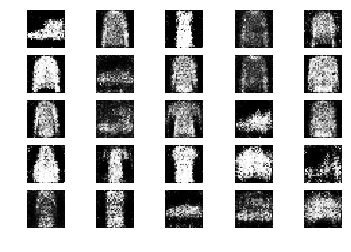

2801 [D loss: 0.565063, acc.: 71.88%] [G loss: 0.967883]
2802 [D loss: 0.557343, acc.: 68.75%] [G loss: 0.987418]
2803 [D loss: 0.617391, acc.: 62.50%] [G loss: 1.003102]
2804 [D loss: 0.704494, acc.: 54.69%] [G loss: 1.034035]
2805 [D loss: 0.647631, acc.: 59.38%] [G loss: 1.009728]
2806 [D loss: 0.670660, acc.: 65.62%] [G loss: 0.946390]
2807 [D loss: 0.605083, acc.: 62.50%] [G loss: 0.935284]
2808 [D loss: 0.618444, acc.: 65.62%] [G loss: 0.993903]
2809 [D loss: 0.608528, acc.: 65.62%] [G loss: 0.998502]
2810 [D loss: 0.687944, acc.: 54.69%] [G loss: 0.998397]
2811 [D loss: 0.655922, acc.: 65.62%] [G loss: 0.967186]
2812 [D loss: 0.672071, acc.: 57.81%] [G loss: 0.954617]
2813 [D loss: 0.616898, acc.: 70.31%] [G loss: 0.908776]
2814 [D loss: 0.614871, acc.: 64.06%] [G loss: 0.863532]
2815 [D loss: 0.612770, acc.: 65.62%] [G loss: 0.898652]
2816 [D loss: 0.586420, acc.: 70.31%] [G loss: 0.932407]
2817 [D loss: 0.702611, acc.: 51.56%] [G loss: 0.971872]
2818 [D loss: 0.630274, acc.: 5

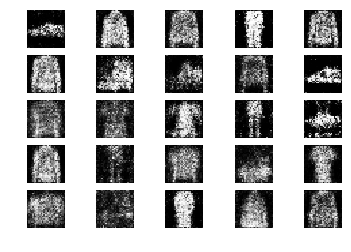

2851 [D loss: 0.675915, acc.: 53.12%] [G loss: 0.938233]
2852 [D loss: 0.673903, acc.: 62.50%] [G loss: 0.894557]
2853 [D loss: 0.605346, acc.: 70.31%] [G loss: 0.920136]
2854 [D loss: 0.560314, acc.: 73.44%] [G loss: 1.042154]
2855 [D loss: 0.668029, acc.: 64.06%] [G loss: 1.061727]
2856 [D loss: 0.598203, acc.: 68.75%] [G loss: 0.923754]
2857 [D loss: 0.616697, acc.: 67.19%] [G loss: 1.030797]
2858 [D loss: 0.620354, acc.: 60.94%] [G loss: 1.046595]
2859 [D loss: 0.630808, acc.: 64.06%] [G loss: 0.826472]
2860 [D loss: 0.656622, acc.: 62.50%] [G loss: 0.924799]
2861 [D loss: 0.579251, acc.: 70.31%] [G loss: 0.929826]
2862 [D loss: 0.608620, acc.: 60.94%] [G loss: 0.942924]
2863 [D loss: 0.683262, acc.: 48.44%] [G loss: 0.999397]
2864 [D loss: 0.512334, acc.: 79.69%] [G loss: 1.038767]
2865 [D loss: 0.652022, acc.: 54.69%] [G loss: 0.964743]
2866 [D loss: 0.607864, acc.: 67.19%] [G loss: 0.930126]
2867 [D loss: 0.603661, acc.: 60.94%] [G loss: 0.878940]
2868 [D loss: 0.670252, acc.: 5

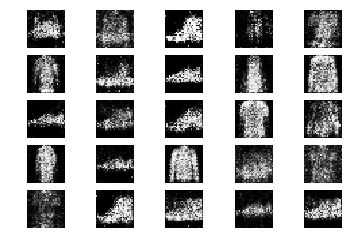

2901 [D loss: 0.627867, acc.: 54.69%] [G loss: 0.970939]
2902 [D loss: 0.597118, acc.: 71.88%] [G loss: 1.030066]
2903 [D loss: 0.593329, acc.: 67.19%] [G loss: 1.028810]
2904 [D loss: 0.598930, acc.: 71.88%] [G loss: 0.959979]
2905 [D loss: 0.681244, acc.: 56.25%] [G loss: 0.992820]
2906 [D loss: 0.618911, acc.: 60.94%] [G loss: 0.976625]
2907 [D loss: 0.671244, acc.: 57.81%] [G loss: 0.977644]
2908 [D loss: 0.674794, acc.: 54.69%] [G loss: 0.899009]
2909 [D loss: 0.558249, acc.: 73.44%] [G loss: 0.938711]
2910 [D loss: 0.626265, acc.: 62.50%] [G loss: 0.880276]
2911 [D loss: 0.577498, acc.: 68.75%] [G loss: 0.968717]
2912 [D loss: 0.608187, acc.: 70.31%] [G loss: 0.892134]
2913 [D loss: 0.625852, acc.: 64.06%] [G loss: 0.890895]
2914 [D loss: 0.621131, acc.: 64.06%] [G loss: 0.928885]
2915 [D loss: 0.731949, acc.: 51.56%] [G loss: 0.957599]
2916 [D loss: 0.624970, acc.: 64.06%] [G loss: 0.923301]
2917 [D loss: 0.611861, acc.: 64.06%] [G loss: 0.956340]
2918 [D loss: 0.566559, acc.: 7

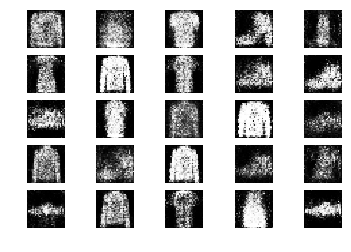

2951 [D loss: 0.620412, acc.: 67.19%] [G loss: 0.944443]
2952 [D loss: 0.601605, acc.: 70.31%] [G loss: 0.971777]
2953 [D loss: 0.640381, acc.: 64.06%] [G loss: 0.972389]
2954 [D loss: 0.590775, acc.: 67.19%] [G loss: 1.000369]
2955 [D loss: 0.591809, acc.: 62.50%] [G loss: 1.023767]
2956 [D loss: 0.632673, acc.: 57.81%] [G loss: 0.974125]
2957 [D loss: 0.663529, acc.: 51.56%] [G loss: 0.912976]
2958 [D loss: 0.643693, acc.: 57.81%] [G loss: 0.970052]
2959 [D loss: 0.572023, acc.: 68.75%] [G loss: 1.009265]
2960 [D loss: 0.624150, acc.: 62.50%] [G loss: 1.073397]
2961 [D loss: 0.601935, acc.: 70.31%] [G loss: 1.026946]
2962 [D loss: 0.644724, acc.: 64.06%] [G loss: 0.971047]
2963 [D loss: 0.687783, acc.: 56.25%] [G loss: 0.982918]
2964 [D loss: 0.651386, acc.: 60.94%] [G loss: 0.942065]
2965 [D loss: 0.626307, acc.: 62.50%] [G loss: 0.936671]
2966 [D loss: 0.582350, acc.: 67.19%] [G loss: 0.925788]
2967 [D loss: 0.617665, acc.: 64.06%] [G loss: 0.932136]
2968 [D loss: 0.634972, acc.: 5

In [11]:

epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

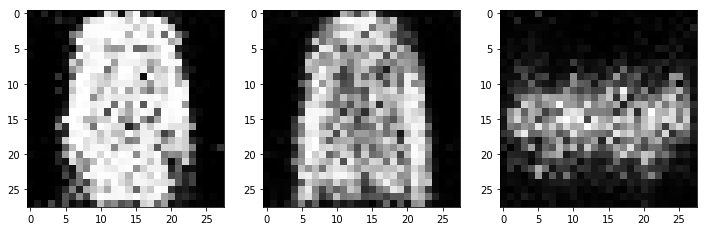

In [12]:

r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()